# Graded Assignment 2 - Air Quality and Weather in the Netherlands


# Introduction to This Template Notebook

* This is a **group** notebook.
* Make sure you work in a **copy** of `...-template.ipynb`,
**renamed** to `...-yourIDnrs.ipynb`,
where `yourIDnrs` is the TU/e identification numbers of the members of the group.

<div class="alert alert-danger" role="danger">
<h3>Integrity</h3>
<ul>
    <li>In this course you must act according to the rules of the TU/e code of scientific conduct.</li>
    <li>This exercise or graded assignment is to be executed by the members of the group independently from other people.</li>
    <li>You must not copy from the Internet, your friends, books... If you represent other people's work as your own, then that constitutes fraud and will be reported to the Examination Committee.</li>
    <li>Making your work available to others (complicity) also constitutes fraud.</li>
</ul>
</div>

You are expected to work with Python code and Markdown in this notebook.

Proceed in this notebook as follows:
* **Read** the assignment (separate PDF).
* **Write** your decisions/solutions/interpretations in the appropriate sections.
  * For this you can use both Code and Markdown cells. Information about how to use these cells is available in the _Getting Started_ assignment.
* **Run** _all_ code cells (also the ones _without_ your code),
    _in linear order_ from the first code cell.

**Personalize your notebook**:
1. Copy the following line of code:

  ```python
AUTHOR_ID_NRS = ['1234567', '2234567', '3234567', '4234567']
  ```
1. Paste them between the marker lines in the next code cell.
1. Fill in the _identification numbers_ of all members of the group as a list of strings between the `Author` markers.
1. Run the code cell by putting the cursor there and typing **Control-Enter**.


In [1]:
#// BEGIN_TODO [Author] Name, Id.nr., Date, as strings (1 point)

AUTHOR_ID_NRS = ['1920847', '2234567', '3234567', '4234567', '1234567']

#// END_TODO [Author]

1. **International Civil Aviation Organization (ICAO) - Environmental Protection**
   - [Contaminants](https://www.icao.int/environmental-protection/pages/contaminants.aspx)

2. **Schiphol Group**
   - [Transport and Traffic Statistics](https://www.schiphol.nl/en/schiphol-group/page/transport-and-traffic-statistics/)

3. **Great Circle Mapper**
   - [Country: NL](http://gc.kls2.com/cgi-bin/gclookup?Q=country:NL)

4. **CBS Open Data**
   - [Dataset 37478ENG](https://opendata.cbs.nl/statline/#/CBS/en/dataset/37478ENG/table)

5. **Government of the Netherlands**
   - [Man Diagnosed with Coronavirus (COVID-19) in the Netherlands](https://www.government.nl/latest/news/2020/02/27/man-diagnosed-with-coronavirus-covid-19-in-the-netherlands)
   - [Further Easing of Coronavirus Measures](https://www.rijksoverheid.nl/onderwerpen/coronavirus-covid-19/nieuws/2022/03/15/verdere-versoepelingen-coronamaatregelen)


## Table of Contents

- [Preparation](#Preparation)
    - [Load the libraries](#Load-the-libraries)
- [Part 1a. Hypothesis selection](#Part-1a:-Hypothesis-selection)
- [Part 1b. Hypothesis refinement](#Part-1b:-Hypothesis-refinement)
- [Part 2. Queries and data cleaning](#Part-2:-Queries-and-data-cleaning)
- [Part 3. Hypothesis testing and interpretation](#Part-3.-Hypothesis-testing-and-interpretation)
- [Part 4. Pitching results](#Part-4.-Pitching-results)

## Preparation
### Load the libraries

In [2]:
# This is the addtional cell to be able to import treeviz in colab, can just comment out the whole section afterwards
# from google.colab import drive
# drive.mount('/content/drive')
# import sys
# sys.path.append('/content/drive/MyDrive/2IAB1 Fundations of Data Analytics/GA2/')


In [3]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression         # for linear regression
from sklearn.cluster import KMeans                        # for clustering
from sklearn.tree import DecisionTreeClassifier           # for decision tree mining
from sklearn.metrics import mean_absolute_error, confusion_matrix
from sklearn.model_selection import train_test_split
from treeviz import tree_print                            # to print decision tree

import scipy.stats as stats                               # to compute z-scores
from scipy.interpolate import interp1d
from scipy.ndimage import gaussian_filter1d
import sqlite3                                            # to interact with the database
import statsmodels.api as sm
from statsmodels.distributions.empirical_distribution import ECDF

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns                                     # also improves the look of plots
sns.set()
plt.rcParams['figure.figsize'] = 10, 5                    # default hor./vert. size of plots, in inches
plt.rcParams['lines.markeredgewidth'] = 1                 # to fix issue with seaborn box plots; needed after import seaborn

## Part 1a: Hypothesis selection

## 1. Shared our posters

###  2. Research question
How does the presence of airports and weather factors influence pollution?
How does wind speed and direction affect the concentration of compounds near an airport?


### 3. Hypotheses

1. The concentration of compounds around airports (and the corresponding weather station) is higher in the direction of the wind.

- The expected outcome is that the concentration is higher in the direction of the wind.





# Exploring Factors Influencing Airport Pollution

## Background
In our investigation of airport pollution, we are exploring how various weather influences, specifically wind speed and direction, impact the concentration of compounds near Schiphol Airport. The primary focus is on understanding the relationship between wind characteristics and the concentration of pollutants emitted by airplanes.

## Factors to Consider

1. **Compounds Emitted by Airplanes:**
   - Examine the compounds emitted by airplanes and their potential impact on air quality.

2. **Air Quality Stations Above Schiphol:**
   - Note that numerous air quality stations are positioned above Schiphol Airport, providing valuable data for analysis.

3. **Choice of Location (Rotterdam vs. Amsterdam):**
   - Opted for Amsterdam as it offers a more suitable dataset for model training.

4. **Correlation with Nitrogen Oxides (NOx):**
   - Initial observations indicate a higher concentration of Nitrogen Oxides in the direction of the wind.

5. **Potential Confounding Variables:**
   - Address potential confounding variables such as car traffic and storms that could influence pollutant concentration.

6. **Seasonal Variation:**
   - Consider seasonal variations, focusing on months with increased travel activity (e.g., summer).

7. **Activity Trends:**
   - Observe trends in airport activity, with October being the most active month and February the least active (as of 2023).

8. **Best Seasons for Travel:**
   - Identify optimal seasons for visiting Amsterdam (April to September) to align with peak travel times.

9. **Data Comparison:**
   - Compare data between April to September and September to April to assess seasonal differences.

10. **Comparison Across Years:**
    - Compare data from 2020 to 2022, taking into account the impact of the pandemic by excluding pandemic-related data.

## Formulating the Hypothesis

"The average concentration of nitrogen oxides (NOx) around Schiphol Airport (and the corresponding weather station) is expected to be higher in the direction of the wind, particularly during periods of greater wind speeds and wind gusts."

**Higher Than What?**
Calculate the average concentration of NOx and compare it to that reference point.

## Data Analysis Approach

- Collect data from air quality stations aligned with the wind direction relative to the weather station.
- Segregate data into bins based on wind direction: one for stations aligned with the airport's wind and another for those not aligned.
- Perform a comparative analysis between the two sets of data to discern patterns and variations.

This structured approach will guide our investigation into the complex interactions between airport pollution, weather influences, and other contributing factors.


## Part 1b: Hypothesis refinement

### 1. Questions about the hypothesis

"Higher than" what? <br>
Which airport/weather stations exactly?<br>
What are the confounding variables?<br>
In which time period?<br>
What other wind factors are there other than direction?<br>
What compounds? <br>


- Use the average concentration of NOx in a direction, and compare it to the average concentration in the opposite direction.
- Use Schiphol Airport, as it has a lot of stations around it.
- Leave out the Covid time period, as there was a significant decrease in plane traffic.
- Planes mainly emit NOx (Nitrogen Oxides) so use this as the compound
- Recorded wind factors are direction, speed and gusts.





#### Confounding variables

- Car traffic in the areas, as cars also emit NOx, and can have a varying frequency
- Storms as they are an extreme weather condition that affects both compound density and plane traffic.
- The seasons in which people travel the most (even though since we compare values for the same time period it is not relevant)
- Air traffics other than via Schiphol

### Refined hypothesis

<b>The average concentration of nitrogen oxides (NOx) around Schiphol Airport (and the corresponding weather station) is higher at air quality stations in the direction of the wind, than the measured NOx concentration opposite the wind direction.<b>


### Null and alternative hypotheses

# Refinement of Hypothesis and Project Workflow

## Refining the Hypothesis

The initial hypothesis can be refined by explicitly stating the reference point for "higher than" in terms of the average concentration of nitrogen oxides (NOx). Additionally, incorporating insights from previous minutes:

**Revised Hypothesis:**
"The average concentration of nitrogen oxides (NOx) around Schiphol Airport (and the corresponding weather station) is expected to be higher at air quality stations in the direction of the wind, particularly during periods of greater wind speeds and wind gusts, compared to the measured NOx concentration at stations facing the opposite wind direction. The comparison will be made based on the calculated average concentration of NOx."

## Project Workflow and Collaboration

To efficiently manage and collaborate on the project, we will follow these steps:

1. **GitHub Usage:**
   - Utilize GitHub for version control and collaborative development.
   - Refer to the [GitHub tutorial](https://www.youtube.com/watch?v=iv8rSLsi1xo) for guidance.

2. **Division of Work:**
   - Shiyun will focus on the second part, specifically cleaning the data.
   - The rest of the team will engage in discussions and planning for Part 3, which involves hypothesis testing.

3. **Hypothesis Testing Planning:**
   - Consider specific aspects for hypothesis testing, such as the range of wind directions to analyze.
   - Define time windows for data analysis and limit the scope to hourly intervals.
   - Discuss potential statistical methods for hypothesis testing.

4. **Next Meeting:**
   - Plan to reconvene either tomorrow or the day after to synchronize progress, share insights, and align on the next steps.

By refining the hypothesis and establishing a collaborative workflow, we aim to enhance the clarity and specificity of our research objectives and ensure a coordinated effort in data cleaning and hypothesis testing.


## Part 2: Queries and data cleaning

## $\forall$ codes written in Part 2 is done by Shiyun, with the intention to present what all group member decided in a single final dataframe named
```python
df_final

# Creating a DataFrame of Civil Airports

The code creates a pandas DataFrame named `df_civil_airports` containing information about various civil airports in the Netherlands. The DataFrame has three columns: 'name', 'latitude', and 'longitude'. Each row corresponds to a different airport, and the columns provide details such as the airport name, latitude, and longitude.

## Data

| name                                               | latitude | longitude |
|----------------------------------------------------|----------|-----------|
| Ameland Airport                                    | 53.2706  | 5.4038    |
| Amsterdam Airport Schiphol                        | 52.1829  | 4.4551    |
| Terlet Airfield                                    | 52.0326  | 5.5528    |
| ...                                                | ...      | ...       |

## Modifying Coordinates

The latitude and longitude values of the airports are then adjusted by adding 0.183 and 0.21, respectively. This modification might represent a small adjustment in the geographical coordinates for better visualization or mapping purposes.

## Resulting DataFrame

The final DataFrame, `df_civil_airports`, includes the original information about civil airports along with the adjusted coordinates 同和老婆forming hypothesis.



In [4]:
df_civil_airports = pd.DataFrame({'name':['Ameland Airport', 'Amsterdam Airport Schiphol', 'Terlet Airfield',
                                          'Kempen Airport (Budel Airport)', 'Den Helder Airport Marinevliegkamp (Naval Air Base) De Kooy', 'Teuge Airport', 'Drachten Airfield', 'Eindhoven Airport Eindhoven Air Base', 'Enschede Airport Twente', 'Groningen Airport Eelde', 'Hilversum Airport', 'Breda International Airport', 'Hoogeveen Airport', 'Lelystad Airport', 'Maastricht Aachen Airport', 'Midden-Zeeland Airport', 'Middenmeer Aerodrome', 'Rotterdam The Hague Airport', 'Stadskanaal Airfield', 'Texel International Airport', 'Oostwold Airport'],
                                  'latitude':[53.2706, 52.1829, 52.0326, 51.1516, 52.5528, 52.1441, 53.0705, 51.2700, 52.1633, 53.0730, 52.1131, 51.3317, 52.4351, 52.2737, 50.5457, 51.3044, 52.4900, 51.5725, 52.5955, 53.0655, 53.1229],
                                  'longitude':[5.4038, 4.4551, 5.5528, 5.3603, 4.4651, 6.0248, 6.0745, 5.2228, 6.5321, 6.3500, 5.0849, 4.3309, 6.3058, 5.3138, 5.4637, 3.4352, 5.0140, 4.2614, 7.0122, 4.5001, 7.0154]})
df_civil_airports['latitude'] += 0.183
df_civil_airports['longitude'] += 0.21
df_civil_airports

,name,latitude,longitude
0,Ameland Airport,53.4536,5.6138
1,Amsterdam Airport Schiphol,52.3659,4.6651
2,Terlet Airfield,52.2156,5.7628
3,Kempen Airport (Budel Airport),51.3346,5.5703
4,Den Helder Airport Marinevliegkamp (Naval Air ...,52.7358,4.6751
5,Teuge Airport,52.3271,6.2348
6,Drachten Airfield,53.2535,6.2845
7,Eindhoven Airport Eindhoven Air Base,51.4530,5.4328
8,Enschede Airport Twente,52.3463,6.7421
9,Groningen Airport Eelde,53.2560,6.5600


# Copied from Help document:

In [5]:
# to compute distances based on coordinates
from math import atan2, cos, radians, sin, sqrt

def great_circle_distance(point1: tuple[float, float], point2: tuple[float, float]) -> float:
    """
    Uses the haversine formula to compute the distance (m) between two
    points (latitude, longitude) in coordinates (in degrees).
    Adapted from http://www.movable-type.co.uk/scripts/latlong.html.
    :param point1: tuple whose first item represents the latitude, and
        its second item the longitude of a point in degrees
    :param point2: tuple whose first item represents the latitude, and
        its second item the longitude of a point in degrees
    :return: great-circle distance between the two points in meters
    """
    r = 6371e3  # radius of the earth, in meters

    latitude1_deg, longitude1_deg = point1  # in degrees
    latitude2_deg, longitude2_deg = point2  # in degrees

    latitude1_rad = radians(latitude1_deg)  # in radians
    latitude2_rad = radians(latitude2_deg)  # in radians

    latitude_delta = radians(latitude2_deg - latitude1_deg)
    longitude_delta = radians(longitude2_deg - longitude1_deg)

    a = sin(latitude_delta / 2) ** 2 + cos(latitude1_rad) * cos(latitude2_rad) * sin(longitude_delta / 2) ** 2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    return r * c


# Connect to database in a standard format

In [6]:
# Connect to database
cnx = sqlite3.connect('datasets/aqw.db')

# Weather and Air Quality Map of the Netherlands

The provided code generates a map that displays the locations of weather stations, air quality stations, and civil airports in the Netherlands. The map is created using the `geopandas` library for geographical data visualization.

## Function: `plot_stations_on_map(df_stations)`

This function takes a DataFrame `df_stations` containing information about the latitude, longitude, and color of various stations (weather, air quality, and civil airports). The function reads a shapefile of the Netherlands map, creates a GeoDataFrame from the station coordinates, and plots them on the map.

### Steps:

1. **Read Shapefile:**
   - The shapefile of the Netherlands map is read from the specified path.

2. **Create GeoDataFrame:**
   - A GeoDataFrame (`gdf`) is created from the station coordinates using the `Point` geometry.

3. **Adjust Coordinate Reference System (CRS):**
   - The coordinate reference system of `gdf` is set to match that of the Netherlands map.

4. **Plot the Map:**
   - A plot is created with the Netherlands map as the background in light grey.
   - Weather and air quality stations are plotted as circles with specified colors.
   - Civil airports are plotted with a different color.

5. **Set Title and Labels:**
   - Title, x-axis label, and y-axis label are set for the map.

6. **Add Legend:**
   - A legend is added to the upper left corner of the map, indicating the colors and types of stations.

7. **Return Axis:**
   - The resulting map axis is returned.

## Function: `all_stations()`

This function retrieves data on air quality stations, weather stations, and civil airports from a SQLite database using SQL queries. Color codes are assigned to weather stations, air quality stations, and civil airports. The resulting DataFrames are concatenated to form a single DataFrame containing all station information.

### Steps:

1. **SQL Queries:**
   - SQL queries are executed to retrieve data on air quality stations (`df_aqs`) and weather stations (`df_ws`) from the database.

2. **Assign Color Codes:**
   - Color codes are assigned to weather and air quality stations.
   - A color code is assigned to civil airports (`df_civil_airports`).

3. **Concatenate DataFrames:**
   - The DataFrames for weather stations, air quality stations, and civil airports are concatenated into a single DataFrame (`df_all_stations`).

4. **Return Result:**
   - The concatenated DataFrame is returned.

## Display the Map:

The map is generated by calling the `plot_stations_on_map` function with the result of `all_stations()`. The map displays the locations of weather stations, air quality stations, and civil airports in the Netherlands with distinct colors and a legend for reference.


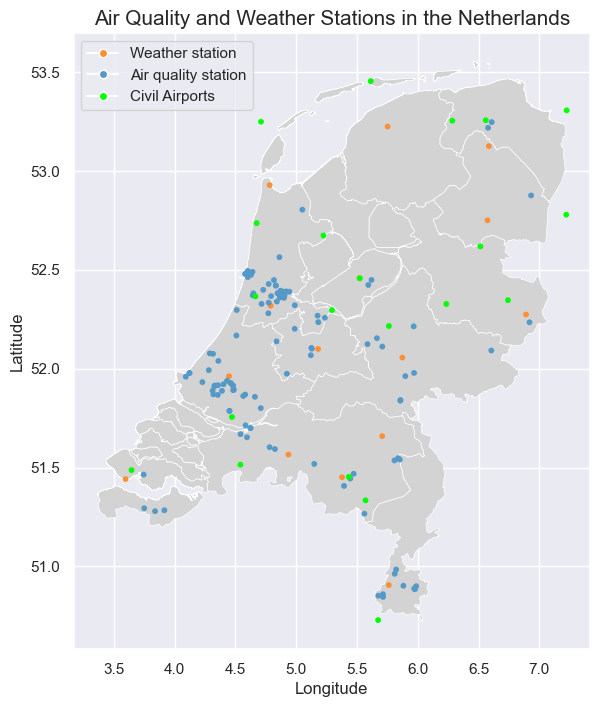

In [7]:
#Weather and Air Quality Map of NL
from matplotlib.lines import Line2D
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
import matplotlib.pyplot as plt
import sqlite3

def plot_stations_on_map(df_stations):
    map_nl = gpd.read_file('./datasets/stanford-st293bj4601-shapefile.zip')

    gdf = gpd.GeoDataFrame(geometry=[Point(x, y) for x, y in zip(df_stations['longitude'], df_stations['latitude'])])
    gdf['color'] = list(df_stations['color'])
    gdf.crs = map_nl.crs

    f, ax = plt.subplots(1, figsize=(8, 8))

    map_nl.plot(linewidth=0.5, edgecolor='white', color='lightgrey',legend=True, ax=ax)
    gdf.plot(ax=ax, marker='o', color=gdf['color'], markersize=10, alpha=1)

    ax.set_title('Air Quality and Weather Stations in the Netherlands', size=15)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

    legend = [
        Line2D([0], [0], markerfacecolor='#FF8F35', marker='o', color='w', label='Weather station'),
        Line2D([0], [0], markerfacecolor='#5499C7', marker='o', color='w', label='Air quality station'),
        Line2D([0], [0], markerfacecolor='#00ff00', marker='o', color='w', label='Civil Airports')
    ]
    ax.legend(handles=legend, loc='upper left')
    return ax

def all_stations():
    aqs_sql = "SELECT name, latitude, longitude FROM air_quality_stations"
    ws_sql = "SELECT name, latitude, longitude FROM weather_stations"
    with cnx as conn:
        df_aqs = pd.read_sql_query(aqs_sql, conn)
        df_ws = pd.read_sql_query(ws_sql, conn)
    df_aqs['color'] = "#5499c7"
    df_ws['color'] = "#ff8f35"
    df_civil_airports['color'] = "#00ff00"
    return pd.concat([df_ws, df_aqs, df_civil_airports])

plot_stations_on_map(all_stations());

# List of the Busiest Airports (Top 5)

The following is a list of the top 5 busiest airports in the Netherlands:

1. Amsterdam Airport Schiphol
2. Eindhoven Airport Eindhoven Air Base
3. Rotterdam The Hague Airport
4. Maastricht Aachen Airport
5. Groningen Airport Eelde

These airports are considered among the busiest and most significant in the country.


In [8]:
lst_of_the_busiest_airports_5 = ['Amsterdam Airport Schiphol', 'Eindhoven Airport Eindhoven Air Base', 'Rotterdam The Hague Airport', 'Maastricht Aachen Airport', 'Groningen Airport Eelde']
lst_of_the_busiest_airports_5

['Amsterdam Airport Schiphol',
 'Eindhoven Airport Eindhoven Air Base',
 'Rotterdam The Hague Airport',
 'Maastricht Aachen Airport',
 'Groningen Airport Eelde']

### Filtering and Sorting Busiest Airports DataFrame

In the provided code snippet, we are performing operations on a DataFrame (`df_civil_airports`) to filter and sort the data related to the busiest airports. Let's break down the steps:

1. **Filtering Busiest Airports:**
    - We start by filtering the original DataFrame (`df_civil_airports`) to include only rows where the 'name' column matches any of the airports in the list `lst_of_the_busiest_airports_5`.

2. **Sorting by Custom Order:**
    - Next, we sort the filtered DataFrame based on the 'name' column. The `key` parameter is used to specify a custom sorting order defined by a lambda function. This lambda function creates a mapping of airport names to their corresponding indices in the list `lst_of_the_busiest_airports_5`.

3. **Resetting Index:**
    - We reset the index of the DataFrame after sorting to have a clean, sequential index.

4. **Dropping Redundant Index Column:**
    - Finally, we drop the redundant 'index' column from the DataFrame.

The resulting DataFrame `df_busiest_airports` contains the information related to the busiest airports, filtered and sorted according to the specified criteria.


In [9]:
df_busiest_airports = df_civil_airports[df_civil_airports['name'].isin(lst_of_the_busiest_airports_5)].copy().sort_values(by='name', key=lambda x: x.map({name: i for i, name in enumerate(lst_of_the_busiest_airports_5)})).reset_index().drop('index', axis=1)
df_busiest_airports

,name,latitude,longitude,color
0,Amsterdam Airport Schiphol,52.3659,4.6651,#00ff00
1,Eindhoven Airport Eindhoven Air Base,51.4530,5.4328,#00ff00
2,Rotterdam The Hague Airport,51.7555,4.4714,#00ff00
3,Maastricht Aachen Airport,50.7287,5.6737,#00ff00
4,Groningen Airport Eelde,53.2560,6.5600,#00ff00


### Explaining Code: Plotting Stations on Map

The provided code defines a function `all_stations()` that retrieves and combines data from two SQL queries related to air quality and weather stations. Additionally, it adds color information to distinguish between different station types. Finally, it plots these stations on a map using the function `plot_stations_on_map()`.

Let's break down the code:

1. **SQL Queries:**
   - Two SQL queries (`aqs_sql` and `ws_sql`) are executed to fetch data about air quality stations and weather stations, respectively, from the database.

2. **Data Retrieval:**
   - Using the established database connection (`cnx`), the code reads the query results into Pandas DataFrames (`df_aqs` and `df_ws`).

3. **Color Assignment:**
   - The 'color' column is added to both DataFrames (`df_aqs` and `df_ws`) with distinct color codes for air quality stations ('#5499c7'), weather stations ('#ff8f35'), and busiest airports ('#00ff00').

4. **Combining DataFrames:**
   - The DataFrames are concatenated along the rows using `pd.concat()` to create a unified DataFrame containing information about air quality stations, weather stations, and busiest airports.

5. **Plotting on Map:**
   - The function `plot_stations_on_map()` is then called with the combined DataFrame to generate a map visualizing the locations of these stations, each type represented by a unique color.

This code facilitates the visualization of various stations on a map, providing a spatial overview of air quality, weather, and busiest airport locations.


<AxesSubplot:title={'center':'Air Quality and Weather Stations in the Netherlands'}, xlabel='Longitude', ylabel='Latitude'>

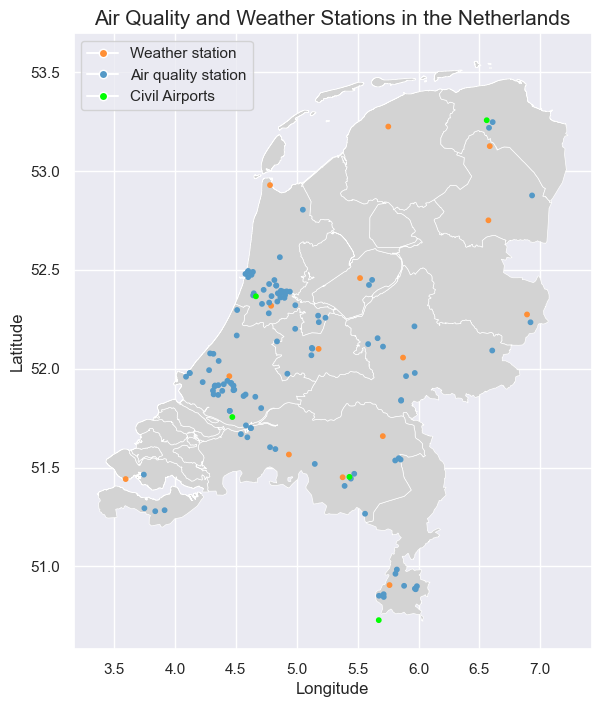

In [10]:
def all_stations():
    aqs_sql = "SELECT name, latitude, longitude FROM air_quality_stations"
    ws_sql = "SELECT name, latitude, longitude FROM weather_stations"
    with cnx as conn:
        df_aqs = pd.read_sql_query(aqs_sql, conn)
        df_ws = pd.read_sql_query(ws_sql, conn)
    df_aqs['color'] = "#5499c7"
    df_ws['color'] = "#ff8f35"
    df_busiest_airports['color'] = "#00ff00"
    return pd.concat([df_ws, df_aqs, df_busiest_airports])
plot_stations_on_map(all_stations())

### Explaining Code: Selecting a Subset of Busiest Airports DataFrame

The provided code snippet involves selecting a subset of the DataFrame `df_busiest_airports` to create a new DataFrame `df_selected_airports`. Let's break down the code:

1. **Subset Selection:**
   - The code uses the `iloc` method to select a specific subset of rows from the original DataFrame `df_busiest_airports`. In this case, it chooses the first row (`iloc[0:1]`), which represents a single airport.

2. **Creating a Copy:**
   - The `copy()` method is applied to the selected subset to create a new DataFrame `df_selected_airports`. This step ensures that any modifications made to this subset do not affect the original DataFrame.

3. **Resulting DataFrame:**
   - The resulting DataFrame `df_selected_airports` contains information about the selected airport(s) from the busiest airports DataFrame. It retains the same structure and columns as the original DataFrame, but with only the specified subset.

This code allows for the isolation of specific airports of interest from the broader dataset, facilitating focused analysis or visualization on the selected subset.


In [11]:
df_selected_airports = df_busiest_airports.iloc[0:1].copy()
df_selected_airports

,name,latitude,longitude,color
0,Amsterdam Airport Schiphol,52.3659,4.6651,#00ff00


### Explaining Code: Plotting Stations on Map

The provided code snippet is part of a function called `all_stations` that retrieves data from air quality and weather stations, assigns colors, and plots them on a map. Let's break down the code:

1. **Querying Data:**
   - Two SQL queries (`aqs_sql` and `ws_sql`) are used to retrieve data about air quality stations (`df_aqs`) and weather stations (`df_ws`) from the respective tables in the database. The `pd.read_sql_query` function is employed to execute these queries and create DataFrames.

2. **Assigning Colors:**
   - Colors are assigned to the air quality stations (`df_aqs`) and weather stations (`df_ws`). The 'color' column is created in both DataFrames, and specific hexadecimal color codes are assigned.

3. **Adding Color for Selected Airports:**
   - It appears that there is an attempt to assign a color (`#00ff00`) to a DataFrame named `df_selected_airports`. However, it's important to note that the code assumes the existence of this DataFrame, and it may need to be defined before this code snippet if not already done.

4. **Concatenating DataFrames:**
   - The DataFrames for air quality stations, weather stations, and selected airports are concatenated using `pd.concat` to create a combined DataFrame.

5. **Plotting on Map:**
   - The function `plot_stations_on_map` is called with the combined DataFrame (`all_stations()`). This function likely takes care of the actual map plotting based on the station coordinates and colors.

This code segment, when executed, will visualize the air quality stations, weather stations, and selected airports on a map with distinct colors for each category.


<AxesSubplot:title={'center':'Air Quality and Weather Stations in the Netherlands'}, xlabel='Longitude', ylabel='Latitude'>

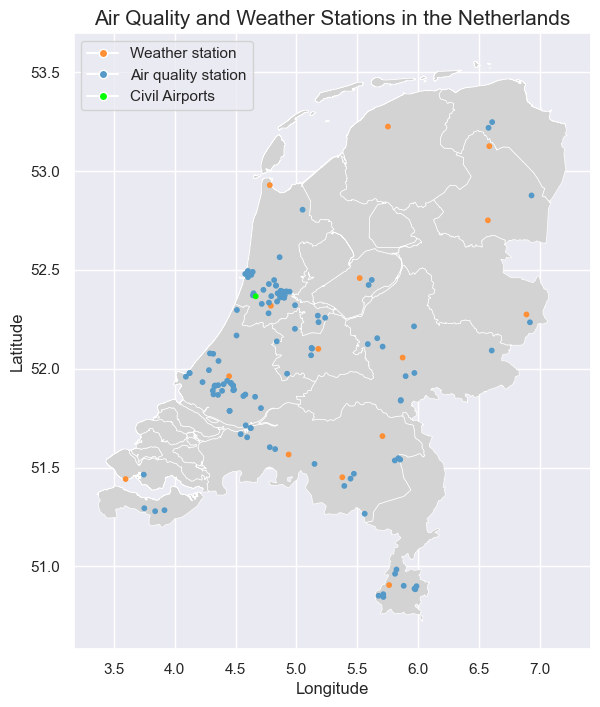

In [12]:
def all_stations():
    aqs_sql = "SELECT name, latitude, longitude FROM air_quality_stations"
    ws_sql = "SELECT name, latitude, longitude FROM weather_stations"
    with cnx as conn:
        df_aqs = pd.read_sql_query(aqs_sql, conn)
        df_ws = pd.read_sql_query(ws_sql, conn)
    df_aqs['color'] = "#5499c7"
    df_ws['color'] = "#ff8f35"
    df_selected_airports['color'] = "#00ff00"
    return pd.concat([df_ws, df_aqs, df_selected_airports])
plot_stations_on_map(all_stations())

### Changing Database Path

The provided code snippet is a comment with instructions for changing the path to the database in different environments (local and Google Colab). Let's break down the instructions:

1. **Local Path:**
   - The first option (`db_path = 'datasets/aqw.db'`) is specified for local environments. It suggests using the relative path to the database file named 'aqw.db' located in the 'datasets' directory.

2. **Google Colab Path:**
   - The second option (`db_path = '/content/drive/MyDrive/2IAB1 Fundations of Data Analytics/GA2/datasets/aqw.db'`) is provided for Google Colab environment. It suggests using the absolute path to the same 'aqw.db' file, assuming it is located in a specific directory structure within Google Drive ('/content/drive/MyDrive/...').

To choose the appropriate path, uncomment the desired line based on the environment you are working in. Comment out the line that is not applicable to your current setup. This allows for easy switching between local and Google Colab environments.


In [13]:
# Change this directory to localize in local environments or Google Colab Env:
# 1. Local Path:
db_path = 'datasets/aqw.db'
# 2. Path to the database Google Colab Env:
# db_path = '/content/drive/MyDrive/2IAB1 Fundations of Data Analytics/GA2/datasets/aqw.db'

# Approach and Disclaimer

In my workflow, I prefer working with pandas, and as a personal preference, I initially loaded the entire dataset into memory using pandas. Additionally, I choose to display the complete DataFrame without utilizing methods like `.head()` or `.tail()` to provide a comprehensive view of the data. This approach allows me to access more information at once and aligns with my working style.

### Loading Air Quality Data

The provided code snippet demonstrates the process of loading air quality data into a DataFrame using SQL queries. Here's a breakdown of the code:

1. **Query Definition:**
   - The variable `query_air_quality_data` contains a SQL query string to select all columns and rows from the 'air_quality_data' table.

2. **Data Loading:**
   - The `pd.read_sql_query` function is used to execute the SQL query (`query_air_quality_data`) on the specified database connection (`cnx`) and retrieve the results into a Pandas DataFrame named `air_quality_data`.

This code snippet is essential for retrieving the air quality data from the database and loading it into a format (DataFrame) that can be easily manipulated and analyzed using Pandas.


In [14]:
# 1 load air_quality_data dataframe
query_air_quality_data = '''
  SELECT * FROM 'air_quality_data'
'''
air_quality_data = pd.read_sql_query(query_air_quality_data, cnx)

In [15]:
# print air_quality_data
air_quality_data

,id,station_code,datetime,bc,co,nh_3,no,no_2,no_x,o_3,pm_10,pm_25,so_2
0,1,NL49551,2012-01-01 01:00:00+01:00,NaN,248.0,NaN,6.0,26.0,35.20,NaN,175.6,116.3,13.0
1,2,NL49553,2012-01-01 01:00:00+01:00,NaN,356.0,NaN,78.0,80.0,199.60,NaN,NaN,NaN,94.0
2,3,NL01484,2012-01-01 01:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.3
3,4,NL01485,2012-01-01 01:00:00+01:00,NaN,NaN,NaN,1.4,11.3,13.45,50.4,105.8,97.9,4.7
4,5,NL01486,2012-01-01 01:00:00+01:00,NaN,NaN,NaN,12.1,21.7,40.25,NaN,NaN,NaN,16.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8600718,8600719,NL49557,2021-12-31 23:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.9,7.0,NaN
8600719,8600720,NL49570,2021-12-31 23:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.5,10.8,NaN
8600720,8600721,NL49572,2021-12-31 23:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.3,6.2,NaN
8600721,8600722,NL49573,2021-12-31 23:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.8,5.4,NaN


# Reminer for myself: Need to get rid of NaN, Out-of-range data, Inconsistent Data

### Loading Air Quality Stations Data

The provided code snippet illustrates the process of loading air quality stations data into a DataFrame using SQL queries. Here's a breakdown of the code:

1. **Query Definition:**
   - The variable `query_air_quality_stations` contains a SQL query string to select all columns and rows from the 'air_quality_stations' table.

2. **Data Loading:**
   - The `pd.read_sql_query` function is utilized to execute the SQL query (`query_air_quality_stations`) on the specified database connection (`cnx`) and retrieve the results into a Pandas DataFrame named `air_quality_stations`.

This code snippet is crucial for obtaining information about air quality stations, allowing for further analysis and integration with other data sources.


In [16]:
# 2 load query_air_quality_stations dataframe
query_air_quality_stations = '''
  SELECT * FROM 'air_quality_stations'
'''
air_quality_stations = pd.read_sql_query(query_air_quality_stations, cnx)

In [17]:
# print air_quality_stations
air_quality_stations

,code,name,latitude,longitude
0,NL49551,IJmuiden-Kanaaldijk,52.463039,4.601842
1,NL49553,Wijk aan Zee-Burgemeester Rothestraat,52.493992,4.601986
2,NL10131,Vredepeel-Vredeweg,51.540520,5.853070
3,NL10136,Heerlen-Looierstraat,50.887959,5.970496
4,NL10138,Heerlen-Jamboreepad,50.900317,5.986853
...,...,...,...,...
109,NL10545,Amsterdam-A10 west,52.339498,4.841021
110,NL10546,Zaanstad-Hemkade,52.420220,4.832063
111,NL10728,Apeldoorn-Stationsstraat,52.213965,5.966719
112,NL10743,Kootwijkerbroek-Drieenhuizerweg,52.154067,5.664074


### Loading Close Stations Data

In the provided code snippet, data from the 'close_stations' table is loaded into a Pandas DataFrame. Here's a breakdown of the code:

1. **Query Definition:**
   - The variable `query_close_stations` holds a SQL query string to select all columns and rows from the 'close_stations' table.

2. **Data Loading:**
   - The `pd.read_sql_query` function is employed to execute the SQL query (`query_close_stations`) on the specified database connection (`cnx`) and retrieve the results into a Pandas DataFrame named `close_stations`.

This code is essential for obtaining information about stations that are close in proximity, enabling further analysis and exploration of relationships between different stations.


In [18]:
# 3 load close_stations dataframe
query_close_stations = '''
  SELECT * FROM 'close_stations'
'''
close_stations = pd.read_sql_query(query_close_stations, cnx)

### Data Cleaning: Converting Data Types

In the provided code snippet, data cleaning operations are performed on the 'close_stations' DataFrame. Here's an explanation of the code:

1. **Conversion to Numeric:**
   - The 'weather_station_code' column is converted to numeric format using `pd.to_numeric`. The `errors='coerce'` parameter ensures that any values that cannot be converted to numeric are replaced with NaN (Not a Number).

2. **Result:**
   - The modified DataFrame is displayed, showing the updated 'close_stations' data with the 'weather_station_code' column in numeric format.

This step is crucial for ensuring that the relevant columns have appropriate data types, facilitating subsequent analyses and merging operations.


In [19]:
# print close_stations
close_stations['weather_station_code'] = pd.to_numeric(close_stations['weather_station_code'], errors='coerce')
close_stations

,aq_station_code,weather_station_code,distance
0,NL49551,240,20.6
1,NL49553,240,23.4
2,NL10131,375,16.6
3,NL10136,380,14.8
4,NL10138,380,15.8
...,...,...,...
120,NL10545,240,4.2
121,NL10546,240,11.7
122,NL10728,275,18.7
123,NL10743,275,18.0


# Data Information

To gain insights into the structure and characteristics of the 'close_stations' DataFrame, I utilized the `info()` method. This method provides a concise summary of the DataFrame, including the data types, non-null counts, and memory usage.

Here's a breakdown of the information obtained:

- **Data Types:** The data types of each column, such as integers, floats, or objects.
- **Non-null Counts:** The number of non-null (non-missing) values in each column.
- **Memory Usage:** The overall memory usage of the DataFrame.

This information is crucial for understanding the dataset's composition and preparing for subsequent data manipulation and analysis.


In [20]:
close_stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   aq_station_code       125 non-null    object 
 1   weather_station_code  125 non-null    int64  
 2   distance              125 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.1+ KB


### Loading Database Metadata: sqlite_sequence

In the provided code snippet, the 'sqlite_sequence' table is queried from the database and loaded into a DataFrame named 'sqlite_sequence'. Here's a breakdown of the code:

1. **Query for sqlite_sequence:**
   - A SQL query is executed to retrieve all records from the 'sqlite_sequence' table.

2. **Loading into DataFrame:**
   - The results of the query are loaded into a pandas DataFrame named 'sqlite_sequence' using `pd.read_sql_query`.

3. **Result:**
   - The DataFrame 'sqlite_sequence' now holds the data from the 'sqlite_sequence' table.

This step involves fetching metadata from the database, which can be useful for understanding the structure and sequence details of tables.


In [21]:
# 4 load sqlite_sequence dataframe
query_sqlite_sequence = '''
  SELECT * FROM 'sqlite_sequence'
'''
sqlite_sequence = pd.read_sql_query(query_sqlite_sequence, cnx)

In [22]:
# print sqlite_sequence
sqlite_sequence

,name,seq
0,weather_data,1315080
1,air_quality_data,8600723


### Loading Weather Data: weather_data

The provided code snippet loads weather data from the 'weather_data' table in the database into a DataFrame named 'weather_data'. Here's an explanation of the code:

1. **Query for weather_data:**
   - A SQL query is executed to retrieve all records from the 'weather_data' table.

2. **Loading into DataFrame:**
   - The results of the query are loaded into a pandas DataFrame named 'weather_data' using `pd.read_sql_query`.

3. **Result:**
   - The DataFrame 'weather_data' now contains the weather-related information obtained from the 'weather_data' table in the database.

This step involves extracting weather-related data, which is likely to be used in the subsequent analysis or processing stages.


In [23]:
# 5 load weather_data dataframe
query_weather_data = '''
  SELECT * FROM 'weather_data'
'''
weather_data = pd.read_sql_query(query_weather_data, cnx)

In [24]:
# print weather_data
weather_data

,id,station_code,datetime,wind_direction,wind_speed,wind_gust,temperature,sunshine_duration,global_radiation,precipitation,air_pressure,visibility,cloud_cover,humidity,fog,rainfall,snow,thunder,ice_formation
0,1,235,2012-01-01 00:00:00+01:00,220.0,9.0,12.0,9.7,0.0,0.0,0.3,1006.2,60.0,8.0,95.0,0.0,1.0,0.0,0.0,0.0
1,2,235,2012-01-01 01:00:00+01:00,220.0,8.0,12.0,9.4,0.0,0.0,0.5,1005.9,57.0,8.0,95.0,0.0,1.0,0.0,0.0,0.0
2,3,235,2012-01-01 02:00:00+01:00,220.0,8.0,11.0,9.4,0.0,0.0,0.1,1005.8,59.0,8.0,95.0,0.0,1.0,0.0,0.0,0.0
3,4,235,2012-01-01 03:00:00+01:00,220.0,9.0,13.0,9.7,0.0,0.0,0.0,1005.1,58.0,8.0,96.0,0.0,0.0,0.0,0.0,0.0
4,5,235,2012-01-01 04:00:00+01:00,230.0,8.0,13.0,9.6,0.0,0.0,1.1,1005.2,58.0,8.0,96.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1315075,1315076,380,2021-12-31 19:00:00+01:00,240.0,5.0,9.0,12.7,0.0,0.0,0.0,1023.2,70.0,8.0,89.0,0.0,0.0,0.0,0.0,0.0
1315076,1315077,380,2021-12-31 20:00:00+01:00,240.0,4.0,8.0,12.8,0.0,0.0,0.0,1023.6,66.0,8.0,89.0,0.0,0.0,0.0,0.0,0.0
1315077,1315078,380,2021-12-31 21:00:00+01:00,250.0,3.0,7.0,12.7,0.0,0.0,0.0,1024.2,66.0,8.0,89.0,0.0,0.0,0.0,0.0,0.0
1315078,1315079,380,2021-12-31 22:00:00+01:00,230.0,3.0,6.0,12.7,0.0,0.0,0.0,1024.5,65.0,8.0,89.0,0.0,0.0,0.0,0.0,0.0


### Loading Weather Stations Data: weather_stations

The provided code snippet loads weather station data from the 'weather_stations' table in the database into a DataFrame named 'weather_stations'. Here's an explanation of the code:

1. **Query for weather_stations:**
   - A SQL query is executed to retrieve all records from the 'weather_stations' table.

2. **Loading into DataFrame:**
   - The results of the query are loaded into a pandas DataFrame named 'weather_stations' using `pd.read_sql_query`.

3. **Result:**
   - The DataFrame 'weather_stations' now contains information about various weather stations obtained from the 'weather_stations' table in the database.

This step involves extracting data related to weather stations, which can provide additional context for the subsequent analysis or processing stages.


In [25]:
# 6 load weather_stations dataframe
query_weather_stations = '''
  SELECT * FROM 'weather_stations'
'''
weather_stations = pd.read_sql_query(query_weather_stations, cnx)

In [26]:
# print weather_stations
weather_stations

,code,name,latitude,longitude
0,235,De Kooy,52.928,4.781
1,240,Schiphol,52.318,4.790
2,260,De Bilt,52.100,5.180
3,269,Lelystad,52.458,5.520
4,270,Leeuwarden,53.224,5.752
5,275,Deelen,52.056,5.873
6,279,Hoogeveen,52.750,6.574
7,280,Eelde,53.125,6.585
8,290,Twenthe,52.274,6.891
9,310,Vlissingen,51.442,3.596


### Plotting Stations on Map: all_stations()

The provided code snippet defines a function named 'all_stations()' that retrieves information about air quality and weather stations, assigns colors to them, and plots them on a map using the 'plot_stations_on_map()' function. Here's a breakdown of the code:

1. **Querying Air Quality and Weather Stations:**
   - Two SQL queries are executed to retrieve the 'name', 'latitude', and 'longitude' columns from 'air_quality_stations' and 'weather_stations' tables, respectively.

2. **Loading Data into DataFrames:**
   - The query results are loaded into pandas DataFrames ('df_aqs' and 'df_ws').

3. **Assigning Colors:**
   - Colors are assigned to the air quality and weather stations using hex color codes.

4. **Combining DataFrames:**
   - The DataFrames 'df_aqs' and 'df_ws' are combined with the 'df_selected_airports' DataFrame (assuming it is defined elsewhere) using `pd.concat()`.

5. **Plotting on Map:**
   - The 'plot_stations_on_map()' function is called to visualize the stations on a map. The map includes markers for air quality stations, weather stations, and selected airports.

This function provides a visual representation of the geographical distribution of air quality stations, weather stations, and selected airports in the specified colors on a map.


<AxesSubplot:title={'center':'Air Quality and Weather Stations in the Netherlands'}, xlabel='Longitude', ylabel='Latitude'>

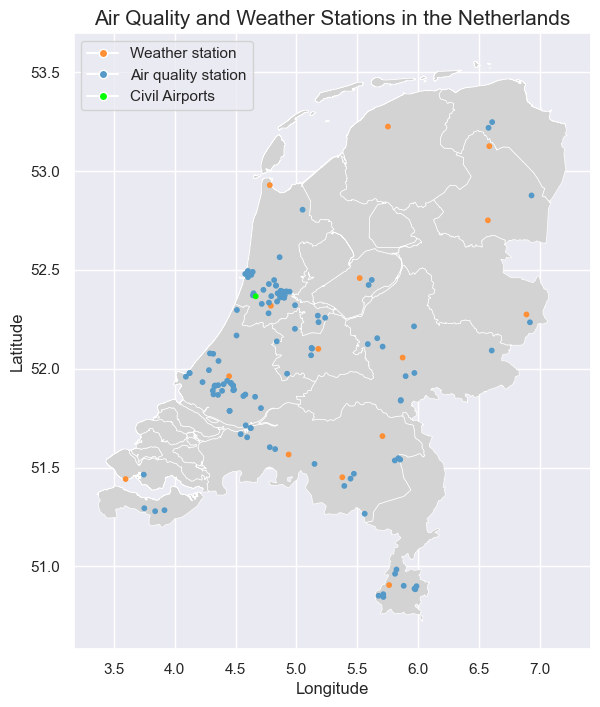

In [27]:
def all_stations():
    aqs_sql = "SELECT name, latitude, longitude FROM air_quality_stations"
    ws_sql = "SELECT name, latitude, longitude FROM weather_stations"
    with cnx as conn:
        df_aqs = pd.read_sql_query(aqs_sql, conn)
        df_ws = pd.read_sql_query(ws_sql, conn)
    df_aqs['color'] = "#5499c7"
    df_ws['color'] = "#ff8f35"
    df_selected_airports['color'] = "#00ff00"
    return pd.concat([df_ws, df_aqs, df_selected_airports])
plot_stations_on_map(all_stations())

# Display schiphol , the selected airport

In [28]:
df_selected_airports

,name,latitude,longitude,color
0,Amsterdam Airport Schiphol,52.3659,4.6651,#00ff00


### Weather Stations Selection Criteria

The provided code defines three lists of weather station codes for specific locations: Amsterdam, Eindhoven, and Rotterdam. The stations are categorized based on cardinal directions and geographical positions. Here's an explanation of the code:

1. **List of Weather Stations for Amsterdam (`WANTED_WEATHER_STATIONS_AMSTERDAM`):**
   - Codes representing weather stations in different directions: North, Mid, South, North-East, and South-East.

2. **List of Weather Stations for Eindhoven (`WANTED_WEATHER_STATIONS_EINDHOVEN`):**
   - Codes representing weather stations in different directions: West, Mid, North-East, and South-East.

3. **List of Weather Stations for Rotterdam (`WANTED_WEATHER_STATIONS_ROTTERDAM`):**
   - Codes representing weather stations in different directions: North, South-East, and South-West.

4. **Combining and Creating Unique Weather Stations List:**
   - The three lists are concatenated to form a single list (`unique_weather_stations_list`).
   - The list is then converted to a set to retain only unique station codes.
   - If needed, the set is converted back to a list.

This approach ensures that the list of weather station codes contains only unique elements from the specified locations, facilitating subsequent data retrieval or analysis with unique stations.


In [29]:
WANTED_WEATHER_STATIONS_AMSTERDAM = [235, 240, 344, 269, 260] # North, Mid, South, North-East, South-East
WANTED_WEATHER_STATIONS_EINDHOVEN = [350, 370, 375, 380] # West, Mid, North-East, South-East
WANTED_WEATHER_STATIONS_ROTTERDAM = [344, 350, 310] # North, South-East, South-West
# Concatenate and convert to set to keep only unique elements
# Convert the set back to a list if needed
unique_weather_stations_list = list(set(WANTED_WEATHER_STATIONS_AMSTERDAM + WANTED_WEATHER_STATIONS_EINDHOVEN + WANTED_WEATHER_STATIONS_ROTTERDAM))
unique_weather_stations_list

[260, 235, 269, 240, 370, 310, 375, 344, 380, 350]

### Selected Weather Stations Based on Criteria

The provided code filters the DataFrame `close_stations` to select weather stations based on specific criteria defined for Amsterdam. Here's an explanation of the code:

1. **Filtering Stations for Amsterdam (`WANTED_WEATHER_STATIONS_AMSTERDAM`):**
   - The DataFrame `close_stations` is filtered using the condition:
     ```
     df_selected_stations = close_stations[close_stations['weather_station_code'].isin(WANTED_WEATHER_STATIONS_AMSTERDAM)]
     ```
   - This condition selects rows where the 'weather_station_code' column matches any of the specified station codes for Amsterdam.

2. **Resulting DataFrame (`df_selected_stations`):**
   - The resulting DataFrame (`df_selected_stations`) contains information about weather stations that meet the criteria for Amsterdam.

This process allows for the selection of weather stations specifically identified for Amsterdam based on the predefined station codes.


In [30]:
df_selected_stations = close_stations[close_stations['weather_station_code'].isin(WANTED_WEATHER_STATIONS_AMSTERDAM)]
df_selected_stations

,aq_station_code,weather_station_code,distance
0,NL49551,240,20.6
1,NL49553,240,23.4
8,NL10404,344,16.7
9,NL10418,344,5.8
10,NL10444,240,19.1
...,...,...,...
115,NL01492,344,5.8
118,NL10432,344,22.4
119,NL10447,344,23.3
120,NL10545,240,4.2


### Selected Air Quality Data Based on Weather Stations

The provided code selects air quality data from the DataFrame `air_quality_data` based on the previously selected weather stations (`df_selected_stations`). Here's an explanation of the code:

1. **Filtering Air Quality Data for Selected Stations:**
   - The code filters the air quality data using the condition:
     ```python
     df_selected_air_quality_data = air_quality_data[['station_code', 'datetime', 'no_x']][air_quality_data['station_code'].isin(df_selected_stations['aq_station_code'])].copy()
     ```
   - This condition selects rows where the 'station_code' column in the air quality data matches any of the station codes in the selected weather stations.

2. **Resulting DataFrame (`df_selected_air_quality_data`):**
   - The resulting DataFrame (`df_selected_air_quality_data`) contains specific air quality data, including columns 'station_code', 'datetime', and 'no_x', for the selected weather stations.

This process facilitates the extraction of relevant air quality data corresponding to the chosen weather stations for further analysis.


In [31]:
df_selected_air_quality_data = air_quality_data[['station_code', 'datetime', 'no_x']][air_quality_data['station_code'].isin(df_selected_stations['aq_station_code'])].copy()
df_selected_air_quality_data

,station_code,datetime,no_x
0,NL49551,2012-01-01 01:00:00+01:00,35.20
1,NL49553,2012-01-01 01:00:00+01:00,199.60
2,NL01484,2012-01-01 01:00:00+01:00,NaN
3,NL01485,2012-01-01 01:00:00+01:00,13.45
4,NL01486,2012-01-01 01:00:00+01:00,40.25
...,...,...,...
8600718,NL49557,2021-12-31 23:00:00+01:00,NaN
8600719,NL49570,2021-12-31 23:00:00+01:00,NaN
8600720,NL49572,2021-12-31 23:00:00+01:00,NaN
8600721,NL49573,2021-12-31 23:00:00+01:00,NaN


## Display Dtype of the columns

In [32]:
df_selected_air_quality_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5312943 entries, 0 to 8600722
Data columns (total 3 columns):
 #   Column        Dtype  
---  ------        -----  
 0   station_code  object 
 1   datetime      object 
 2   no_x          float64
dtypes: float64(1), object(2)
memory usage: 162.1+ MB


# Show Nitrous Oxides concentration statistical data

In [33]:
df_selected_air_quality_data.describe()

,no_x
count,4.170317e+06
mean,4.464755e+01
std,5.301495e+01
min,-6.390000e+00
25%,1.408000e+01
50%,2.802600e+01
75%,5.475000e+01
max,2.056020e+03


# Display Dtypes

In [34]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1315080 entries, 0 to 1315079
Data columns (total 19 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   id                 1315080 non-null  int64  
 1   station_code       1315080 non-null  int64  
 2   datetime           1315080 non-null  object 
 3   wind_direction     1315019 non-null  float64
 4   wind_speed         1315020 non-null  float64
 5   wind_gust          1315019 non-null  float64
 6   temperature        1315020 non-null  float64
 7   sunshine_duration  1315019 non-null  float64
 8   global_radiation   1315019 non-null  float64
 9   precipitation      1315019 non-null  float64
 10  air_pressure       1315020 non-null  float64
 11  visibility         1313277 non-null  float64
 12  cloud_cover        1312928 non-null  float64
 13  humidity           1315020 non-null  float64
 14  fog                1313202 non-null  float64
 15  rainfall           1313202 non-n

# Display all weather factors' dataframe column name

In [35]:
weather_data

,id,station_code,datetime,wind_direction,wind_speed,wind_gust,temperature,sunshine_duration,global_radiation,precipitation,air_pressure,visibility,cloud_cover,humidity,fog,rainfall,snow,thunder,ice_formation
0,1,235,2012-01-01 00:00:00+01:00,220.0,9.0,12.0,9.7,0.0,0.0,0.3,1006.2,60.0,8.0,95.0,0.0,1.0,0.0,0.0,0.0
1,2,235,2012-01-01 01:00:00+01:00,220.0,8.0,12.0,9.4,0.0,0.0,0.5,1005.9,57.0,8.0,95.0,0.0,1.0,0.0,0.0,0.0
2,3,235,2012-01-01 02:00:00+01:00,220.0,8.0,11.0,9.4,0.0,0.0,0.1,1005.8,59.0,8.0,95.0,0.0,1.0,0.0,0.0,0.0
3,4,235,2012-01-01 03:00:00+01:00,220.0,9.0,13.0,9.7,0.0,0.0,0.0,1005.1,58.0,8.0,96.0,0.0,0.0,0.0,0.0,0.0
4,5,235,2012-01-01 04:00:00+01:00,230.0,8.0,13.0,9.6,0.0,0.0,1.1,1005.2,58.0,8.0,96.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1315075,1315076,380,2021-12-31 19:00:00+01:00,240.0,5.0,9.0,12.7,0.0,0.0,0.0,1023.2,70.0,8.0,89.0,0.0,0.0,0.0,0.0,0.0
1315076,1315077,380,2021-12-31 20:00:00+01:00,240.0,4.0,8.0,12.8,0.0,0.0,0.0,1023.6,66.0,8.0,89.0,0.0,0.0,0.0,0.0,0.0
1315077,1315078,380,2021-12-31 21:00:00+01:00,250.0,3.0,7.0,12.7,0.0,0.0,0.0,1024.2,66.0,8.0,89.0,0.0,0.0,0.0,0.0,0.0
1315078,1315079,380,2021-12-31 22:00:00+01:00,230.0,3.0,6.0,12.7,0.0,0.0,0.0,1024.5,65.0,8.0,89.0,0.0,0.0,0.0,0.0,0.0


# Select Weather factors for the hypothesis

In [36]:
WANTED_WEATHER_FACTORS = ['wind_direction', 'wind_speed', 'wind_gust']
WANTED_WEATHER_FACTORS

['wind_direction', 'wind_speed', 'wind_gust']

### Selected Weather Data Based on Weather Stations

The provided code selects weather data from the DataFrame `weather_data` based on the previously selected weather stations (`df_selected_stations`). Here's an explanation of the code:

1. **Filtering Weather Data for Selected Stations:**
   - The code filters the weather data using the condition:
     ```python
     df_selected_weather_data = weather_data[['station_code', 'datetime'] + WANTED_WEATHER_FACTORS][weather_data['station_code'].isin(df_selected_stations['weather_station_code'])].copy()
     ```
   - This condition selects rows where the 'station_code' column in the weather data matches any of the weather station codes in the selected weather stations. It includes the columns 'station_code', 'datetime', and additional weather factors specified in `WANTED_WEATHER_FACTORS`.

2. **Resulting DataFrame (`df_selected_weather_data`):**
   - The resulting DataFrame (`df_selected_weather_data`) contains specific weather data, including columns 'station_code', 'datetime', and additional selected weather factors, for the chosen weather stations.

This process facilitates the extraction of relevant weather data corresponding to the selected weather stations for further analysis.


In [37]:
df_selected_weather_data = weather_data[['station_code', 'datetime'] + WANTED_WEATHER_FACTORS][weather_data['station_code'].isin(df_selected_stations['weather_station_code'])].copy()
df_selected_weather_data

,station_code,datetime,wind_direction,wind_speed,wind_gust
0,235,2012-01-01 00:00:00+01:00,220.0,9.0,12.0
1,235,2012-01-01 01:00:00+01:00,220.0,8.0,12.0
2,235,2012-01-01 02:00:00+01:00,220.0,8.0,11.0
3,235,2012-01-01 03:00:00+01:00,220.0,9.0,13.0
4,235,2012-01-01 04:00:00+01:00,230.0,8.0,13.0
...,...,...,...,...,...
964387,344,2021-12-31 19:00:00+01:00,230.0,6.0,12.0
964388,344,2021-12-31 20:00:00+01:00,240.0,6.0,10.0
964389,344,2021-12-31 21:00:00+01:00,230.0,5.0,9.0
964390,344,2021-12-31 22:00:00+01:00,220.0,6.0,9.0


# Now I have df_selected_airports, df_selected_stations, df_selected_air_quality_data, df_selected_weather_data to concatenate $\lor$ merge

# Display station column names

In [38]:
df_selected_stations

,aq_station_code,weather_station_code,distance
0,NL49551,240,20.6
1,NL49553,240,23.4
8,NL10404,344,16.7
9,NL10418,344,5.8
10,NL10444,240,19.1
...,...,...,...
115,NL01492,344,5.8
118,NL10432,344,22.4
119,NL10447,344,23.3
120,NL10545,240,4.2


### Merging Selected Stations with Air Quality Data

In this code snippet, the selected air quality data (`df_selected_air_quality_data`) is merged with the previously selected weather stations (`df_selected_stations`). Here's a breakdown of the code:

1. **Merging DataFrames:**
   - The code uses `pd.merge` to merge two DataFrames (`df_selected_stations` and `df_selected_air_quality_data`) based on the common columns 'aq_station_code' in the left DataFrame and 'station_code' in the right DataFrame.
     ```python
     df_selection = pd.merge(df_selected_stations, df_selected_air_quality_data, left_on='aq_station_code', right_on='station_code')
     ```
2. **Dropping Redundant Column:**
   - After the merge, the code drops the redundant 'station_code' column to avoid duplication.
     ```python
     df_selection = df_selection.drop('station_code', axis=1)
     ```
3. **Resulting DataFrame (`df_selection`):**
   - The resulting DataFrame (`df_selection`) now contains a merged dataset with information from both air quality stations and weather stations. The 'station_code' column from the air quality data has been dropped to avoid redundancy.

This combined dataset (`df_selection`) is now ready for further analysis, incorporating both air quality and weather information for the selected stations.


In [39]:
df_selection = pd.merge(df_selected_stations, df_selected_air_quality_data, left_on='aq_station_code', right_on='station_code')
df_selection = df_selection.drop('station_code', axis=1)
df_selection

,aq_station_code,weather_station_code,distance,datetime,no_x
0,NL49551,240,20.6,2012-01-01 01:00:00+01:00,35.20
1,NL49551,240,20.6,2012-01-01 02:00:00+01:00,14.53
2,NL49551,240,20.6,2012-01-01 03:00:00+01:00,9.00
3,NL49551,240,20.6,2012-01-01 04:00:00+01:00,9.00
4,NL49551,240,20.6,2012-01-01 05:00:00+01:00,10.00
...,...,...,...,...,...
5312938,NL10546,240,11.7,2012-12-31 20:00:00+01:00,NaN
5312939,NL10546,240,11.7,2012-12-31 21:00:00+01:00,NaN
5312940,NL10546,240,11.7,2012-12-31 22:00:00+01:00,NaN
5312941,NL10546,240,11.7,2012-12-31 23:00:00+01:00,NaN


# Display column names

In [40]:
df_selected_weather_data

,station_code,datetime,wind_direction,wind_speed,wind_gust
0,235,2012-01-01 00:00:00+01:00,220.0,9.0,12.0
1,235,2012-01-01 01:00:00+01:00,220.0,8.0,12.0
2,235,2012-01-01 02:00:00+01:00,220.0,8.0,11.0
3,235,2012-01-01 03:00:00+01:00,220.0,9.0,13.0
4,235,2012-01-01 04:00:00+01:00,230.0,8.0,13.0
...,...,...,...,...,...
964387,344,2021-12-31 19:00:00+01:00,230.0,6.0,12.0
964388,344,2021-12-31 20:00:00+01:00,240.0,6.0,10.0
964389,344,2021-12-31 21:00:00+01:00,230.0,5.0,9.0
964390,344,2021-12-31 22:00:00+01:00,220.0,6.0,9.0


### Merging Selected Stations with Weather Data

This markdown provides an explanation for the code snippet that merges the previously selected stations (`df_selection`) with the selected weather data (`df_selected_weather_data`). Here's a step-by-step explanation:

1. **Merging DataFrames:**
   - The code uses `pd.merge` to merge two DataFrames (`df_selection` and `df_selected_weather_data`).
     ```python
     df_selection = pd.merge(df_selection, df_selected_weather_data, left_on=['weather_station_code', 'datetime'], right_on=['station_code', 'datetime'])
     ```
   - The merge is performed based on two common columns: 'weather_station_code' in the left DataFrame and 'station_code' and 'datetime' in the right DataFrame.

2. **Dropping Redundant Column:**
   - After the merge, the code drops the redundant 'station_code' column to avoid duplication.
     ```python
     df_selection = df_selection.drop('station_code', axis=1)
     ```

3. **Resulting DataFrame (`df_selection`):**
   - The resulting DataFrame (`df_selection`) now contains a comprehensive dataset with information from air quality stations, weather stations, and corresponding timestamps. The 'station_code' column from the weather data has been dropped to maintain a clean structure.

This merged dataset (`df_selection`) is now prepared for further analysis, combining air quality and weather information for the selected stations over time.


In [41]:
df_selection = pd.merge(df_selection, df_selected_weather_data, left_on=['weather_station_code', 'datetime'], right_on=['station_code', 'datetime'])
df_selection = df_selection.drop('station_code', axis=1)
df_selection

,aq_station_code,weather_station_code,distance,datetime,no_x,wind_direction,wind_speed,wind_gust
0,NL49551,240,20.6,2012-01-01 01:00:00+01:00,35.20,230.0,7.0,10.0
1,NL49553,240,23.4,2012-01-01 01:00:00+01:00,199.60,230.0,7.0,10.0
2,NL10444,240,19.1,2012-01-01 01:00:00+01:00,21.16,230.0,7.0,10.0
3,NL10633,240,20.3,2012-01-01 01:00:00+01:00,20.31,230.0,7.0,10.0
4,NL49016,240,10.0,2012-01-01 01:00:00+01:00,NaN,230.0,7.0,10.0
...,...,...,...,...,...,...,...,...
5312938,NL10631,269,6.8,2014-12-31 20:00:00+01:00,13.33,220.0,4.0,6.0
5312939,NL10631,269,6.8,2014-12-31 21:00:00+01:00,44.15,210.0,6.0,8.0
5312940,NL10631,269,6.8,2014-12-31 22:00:00+01:00,37.07,210.0,6.0,8.0
5312941,NL10631,269,6.8,2014-12-31 23:00:00+01:00,33.90,210.0,6.0,8.0


# Display Dtypes

In [42]:
df_selection.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5312943 entries, 0 to 5312942
Data columns (total 8 columns):
 #   Column                Dtype  
---  ------                -----  
 0   aq_station_code       object 
 1   weather_station_code  int64  
 2   distance              float64
 3   datetime              object 
 4   no_x                  float64
 5   wind_direction        float64
 6   wind_speed            float64
 7   wind_gust             float64
dtypes: float64(5), int64(1), object(2)
memory usage: 364.8+ MB


# Check modification of Dtype

In [43]:
df_selection['datetime'] = pd.to_datetime(df_selection['datetime'])
df_selection.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5312943 entries, 0 to 5312942
Data columns (total 8 columns):
 #   Column                Dtype                               
---  ------                -----                               
 0   aq_station_code       object                              
 1   weather_station_code  int64                               
 2   distance              float64                             
 3   datetime              datetime64[ns, pytz.FixedOffset(60)]
 4   no_x                  float64                             
 5   wind_direction        float64                             
 6   wind_speed            float64                             
 7   wind_gust             float64                             
dtypes: datetime64[ns, pytz.FixedOffset(60)](1), float64(5), int64(1), object(1)
memory usage: 364.8+ MB


# Display column names

In [44]:
df_selection

,aq_station_code,weather_station_code,distance,datetime,no_x,wind_direction,wind_speed,wind_gust
0,NL49551,240,20.6,2012-01-01 01:00:00+01:00,35.20,230.0,7.0,10.0
1,NL49553,240,23.4,2012-01-01 01:00:00+01:00,199.60,230.0,7.0,10.0
2,NL10444,240,19.1,2012-01-01 01:00:00+01:00,21.16,230.0,7.0,10.0
3,NL10633,240,20.3,2012-01-01 01:00:00+01:00,20.31,230.0,7.0,10.0
4,NL49016,240,10.0,2012-01-01 01:00:00+01:00,NaN,230.0,7.0,10.0
...,...,...,...,...,...,...,...,...
5312938,NL10631,269,6.8,2014-12-31 20:00:00+01:00,13.33,220.0,4.0,6.0
5312939,NL10631,269,6.8,2014-12-31 21:00:00+01:00,44.15,210.0,6.0,8.0
5312940,NL10631,269,6.8,2014-12-31 22:00:00+01:00,37.07,210.0,6.0,8.0
5312941,NL10631,269,6.8,2014-12-31 23:00:00+01:00,33.90,210.0,6.0,8.0


# Display column names

In [45]:
air_quality_stations

,code,name,latitude,longitude
0,NL49551,IJmuiden-Kanaaldijk,52.463039,4.601842
1,NL49553,Wijk aan Zee-Burgemeester Rothestraat,52.493992,4.601986
2,NL10131,Vredepeel-Vredeweg,51.540520,5.853070
3,NL10136,Heerlen-Looierstraat,50.887959,5.970496
4,NL10138,Heerlen-Jamboreepad,50.900317,5.986853
...,...,...,...,...
109,NL10545,Amsterdam-A10 west,52.339498,4.841021
110,NL10546,Zaanstad-Hemkade,52.420220,4.832063
111,NL10728,Apeldoorn-Stationsstraat,52.213965,5.966719
112,NL10743,Kootwijkerbroek-Drieenhuizerweg,52.154067,5.664074


### Extracting Air Quality Station Names

The provided code extracts the names of air quality stations based on their station codes present in the merged DataFrame (`df_selection`). Here's a concise explanation:

**DataFrame Filtering:**
- The code filters the 'air_quality_stations' DataFrame based on a condition related to the 'code' column.
  ```python
  air_quality_stations['code'].isin(df_selection['aq_station_code'])
This condition checks whether the 'code' values in 'air_quality_stations' are present in the 'aq_station_code' column of the merged DataFrame (df_selection).

**Extracting Names:**
- The resulting DataFrame is then used to extract the 'name' column.
- This operation retrieves the names of air quality stations corresponding to the selected station codes.

This step is essential for understanding which air quality stations are included in the merged dataset (df_selection), providing insight into the specific stations used for analysis.

In [46]:
air_quality_stations[air_quality_stations['code'].isin(df_selection['aq_station_code'])]['name']

0                        IJmuiden-Kanaaldijk
1      Wijk aan Zee-Burgemeester Rothestraat
8                    Den Haag-Rebecquestraat
9                   Rotterdam-Schiedamsevest
10                    De Zilk-Vogelaarsdreef
                       ...                  
104                      Rotterdam-Vasteland
107               Hoek van Holland-Berghaven
108             Leiden-Willem de Zwijgerlaan
109                       Amsterdam-A10 west
110                         Zaanstad-Hemkade
Name: name, Length: 74, dtype: object

# Dislpay column data

In [47]:
weather_stations

,code,name,latitude,longitude
0,235,De Kooy,52.928,4.781
1,240,Schiphol,52.318,4.790
2,260,De Bilt,52.100,5.180
3,269,Lelystad,52.458,5.520
4,270,Leeuwarden,53.224,5.752
5,275,Deelen,52.056,5.873
6,279,Hoogeveen,52.750,6.574
7,280,Eelde,53.125,6.585
8,290,Twenthe,52.274,6.891
9,310,Vlissingen,51.442,3.596


### Extracting Weather Station Names

The provided code extracts the names of weather stations based on their station codes present in the merged DataFrame (`df_selection`). Here's a concise explanation:

**DataFrame Filtering:**
- The code filters the 'weather_stations' DataFrame based on a condition related to the 'code' column.
  ```python
  weather_stations['code'].isin(df_selection['weather_station_code'])
- This condition checks whether the 'code' values in 'weather_stations' are present in the 'weather_station_code' column of the merged DataFrame (df_selection).

**Extracting Names:**
- The resulting DataFrame is then used to extract the 'name' column.
- This operation retrieves the names of weather stations corresponding to the selected station codes.

This step is essential for understanding which weather stations are included in the merged dataset (df_selection), providing insight into the specific stations used for analysis.

In [48]:
weather_stations[weather_stations['code'].isin(df_selection['weather_station_code'])]['name']

0       De Kooy
1      Schiphol
2       De Bilt
3      Lelystad
10    Rotterdam
Name: name, dtype: object

### Plotting All Selected Stations on Map

This markdown provides an explanation for the code snippet that creates a map plotting all selected stations (`df_selection`), air quality stations (`df_aqs`), weather stations (`df_ws`), and selected airports (`df_selected_airports`). Here's a step-by-step breakdown:

1. **Reading Station Coordinates:**
   - Two SQL queries are used to fetch the latitude and longitude information for air quality stations (`df_aqs`) and weather stations (`df_ws`).
     ```python
     aqs_sql = "SELECT name, latitude, longitude FROM air_quality_stations"
     ws_sql = "SELECT name, latitude, longitude FROM weather_stations"
     ```

2. **Filtering Stations:**
   - The code filters the air quality stations and weather stations based on the selected station codes (`df_selection['aq_station_code']` and `df_selection['weather_station_code']`).
     ```python
     df_aqs = df_aqs[df_aqs['name'].isin(air_quality_stations[air_quality_stations['code'].isin(df_selection['aq_station_code'])]['name'])]
     df_ws = df_ws[df_ws['name'].isin(weather_stations[weather_stations['code'].isin(df_selection['weather_station_code'])]['name'])]
     ```

3. **Assigning Colors:**
   - Colors are assigned to the air quality stations (`#5499c7`), weather stations (`#ff8f35`), and selected airports (`#00ff00`).
     ```python
     df_aqs['color'] = "#5499c7"
     df_ws['color'] = "#ff8f35"
     df_selected_airports['color'] = "#00ff00"
     ```

4. **Concatenating DataFrames:**
   - The DataFrames (`df_ws`, `df_aqs`, and `df_selected_airports`) are concatenated to create a unified DataFrame.
     ```python
     return pd.concat([df_ws, df_aqs, df_selected_airports])
     ```

5. **Plotting on Map:**
   - The concatenated DataFrame is passed to the `plot_stations_on_map` function, which generates a map with markers for all selected stations.

This map provides a visual representation of the geographical distribution of air quality stations, weather stations, and selected airports in the specified colors.


         name  latitude  longitude    color
0     De Kooy    52.928      4.781  #ff8f35
1    Schiphol    52.318      4.790  #ff8f35
2     De Bilt    52.100      5.180  #ff8f35
3    Lelystad    52.458      5.520  #ff8f35
10  Rotterdam    51.962      4.447  #ff8f35


<AxesSubplot:title={'center':'Air Quality and Weather Stations in the Netherlands'}, xlabel='Longitude', ylabel='Latitude'>

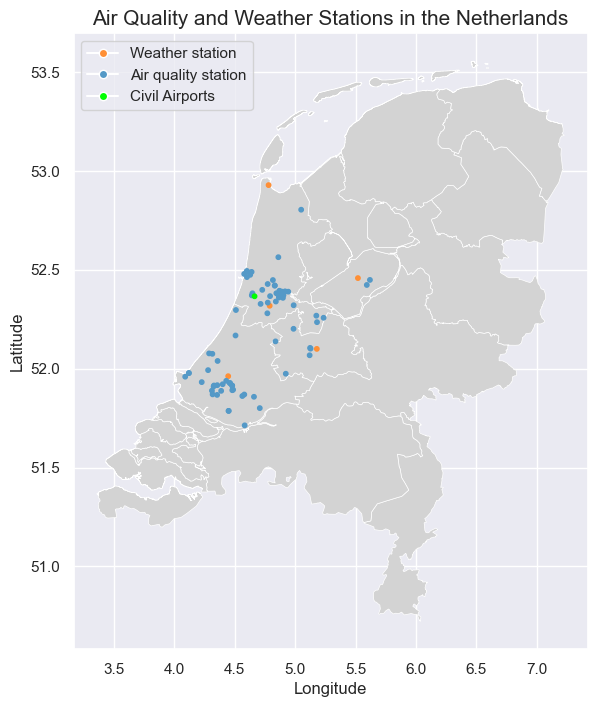

In [49]:
def all_stations():
    aqs_sql = "SELECT name, latitude, longitude FROM air_quality_stations"
    ws_sql = "SELECT name, latitude, longitude FROM weather_stations"
    with cnx as conn:
        df_aqs = pd.read_sql_query(aqs_sql, conn)
        df_ws = pd.read_sql_query(ws_sql, conn)
    df_aqs = df_aqs[df_aqs['name'].isin(air_quality_stations[air_quality_stations['code'].isin(df_selection['aq_station_code'])]['name'])]
    df_ws = df_ws[df_ws['name'].isin(weather_stations[weather_stations['code'].isin(df_selection['weather_station_code'])]['name'])]
    df_aqs['color'] = "#5499c7"
    df_ws['color'] = "#ff8f35"
    print(df_ws)
    df_selected_airports['color'] = "#00ff00"
    return pd.concat([df_ws, df_aqs, df_selected_airports])
plot_stations_on_map(all_stations())

# Display and decide which feature to clean

In [50]:
df_selection.describe()

,weather_station_code,distance,no_x,wind_direction,wind_speed,wind_gust
count,5.312943e+06,5.312943e+06,4.170317e+06,5.312943e+06,5.312943e+06,5.312943e+06
mean,2.830480e+02,1.281618e+01,4.464755e+01,1.961480e+02,4.497335e+00,7.512054e+00
std,4.902272e+01,6.876081e+00,5.301495e+01,1.133762e+02,2.622891e+00,4.006420e+00
min,2.350000e+02,2.100000e+00,-6.390000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.400000e+02,7.000000e+00,1.408000e+01,1.200000e+02,3.000000e+00,5.000000e+00
50%,2.600000e+02,1.190000e+01,2.802600e+01,2.000000e+02,4.000000e+00,7.000000e+00
75%,3.440000e+02,1.910000e+01,5.475000e+01,2.600000e+02,6.000000e+00,1.000000e+01
max,3.440000e+02,3.080000e+01,2.056020e+03,9.900000e+02,2.400000e+01,3.700000e+01


# COVID in Netherlands start from 2020 Feb, end at June 2022

In [51]:
# covid start from 2020 Feb, end at June 2022
start_date = pd.Timestamp('2020-02-01', tz='Europe/Paris')
end_date = pd.Timestamp('2022-06-30', tz='Europe/Paris')

### Excluding COVID Period from Data

This markdown explains the code snippet that filters the `df_selection` DataFrame to exclude data recorded during the COVID period. Here's a detailed breakdown:

1. **Specifying COVID Start and End Dates:**
   - The start and end dates for the COVID period are defined using `pd.Timestamp`.
     ```python
     start_date = pd.Timestamp('2020-02-01', tz='Europe/Paris')
     end_date = pd.Timestamp('2022-06-30', tz='Europe/Paris')
     ```

2. **Filtering Data:**
   - The code filters the `df_selection` DataFrame based on the datetime column, excluding data recorded during the COVID period.
     ```python
     df_selection_without_covid = df_selection[(df_selection['datetime'] < start_date) | (df_selection['datetime'] > end_date)]
     ```

3. **Resulting DataFrame:**
   - The resulting DataFrame (`df_selection_without_covid`) contains data recorded outside the specified COVID period.

This step is essential for conducting analysis or hypothesis testing without the influence of the COVID-19 pandemic, allowing for a more focused examination of the selected air quality and weather data.


In [52]:
df_selection_without_covid = df_selection[(df_selection['datetime'] < start_date) | (df_selection['datetime'] > end_date)]
df_selection_without_covid

,aq_station_code,weather_station_code,distance,datetime,no_x,wind_direction,wind_speed,wind_gust
0,NL49551,240,20.6,2012-01-01 01:00:00+01:00,35.20,230.0,7.0,10.0
1,NL49553,240,23.4,2012-01-01 01:00:00+01:00,199.60,230.0,7.0,10.0
2,NL10444,240,19.1,2012-01-01 01:00:00+01:00,21.16,230.0,7.0,10.0
3,NL10633,240,20.3,2012-01-01 01:00:00+01:00,20.31,230.0,7.0,10.0
4,NL49016,240,10.0,2012-01-01 01:00:00+01:00,NaN,230.0,7.0,10.0
...,...,...,...,...,...,...,...,...
5312938,NL10631,269,6.8,2014-12-31 20:00:00+01:00,13.33,220.0,4.0,6.0
5312939,NL10631,269,6.8,2014-12-31 21:00:00+01:00,44.15,210.0,6.0,8.0
5312940,NL10631,269,6.8,2014-12-31 22:00:00+01:00,37.07,210.0,6.0,8.0
5312941,NL10631,269,6.8,2014-12-31 23:00:00+01:00,33.90,210.0,6.0,8.0


### Sorting DataFrame by Datetime

The provided markdown explains the code snippet responsible for sorting the `df_selection_without_covid` DataFrame based on the 'datetime' column. Let's break down the details:

1. **Sorting Data:**
   - The DataFrame `df_selection_without_covid` is sorted in ascending order based on the 'datetime' column.
     ```python
     df_selection_without_covid = df_selection_without_covid.sort_values(by='datetime')
     ```

2. **Resulting DataFrame:**
   - The resulting DataFrame (`df_selection_without_covid`) now has its rows ordered chronologically by the 'datetime' values.

Sorting the data by datetime is crucial, especially when dealing with time-series data, as it allows for a more organized and sequential representation of the observations. This step ensures that the data is arranged in a meaningful order for subsequent analysis or visualization.


In [53]:
df_selection_without_covid = df_selection_without_covid.sort_values(by='datetime')
df_selection_without_covid

,aq_station_code,weather_station_code,distance,datetime,no_x,wind_direction,wind_speed,wind_gust
0,NL49551,240,20.6,2012-01-01 01:00:00+01:00,35.20,230.0,7.0,10.0
2472376,NL10411,344,11.9,2012-01-01 01:00:00+01:00,NaN,240.0,8.0,13.0
2472377,NL10416,344,8.0,2012-01-01 01:00:00+01:00,NaN,240.0,8.0,13.0
2472378,NL01492,344,5.8,2012-01-01 01:00:00+01:00,NaN,240.0,8.0,13.0
2472379,NL10432,344,22.4,2012-01-01 01:00:00+01:00,NaN,240.0,8.0,13.0
...,...,...,...,...,...,...,...,...
2001951,NL49556,240,27.7,2020-01-31 23:00:00+01:00,NaN,210.0,9.0,13.0
2001952,NL49570,240,21.6,2020-01-31 23:00:00+01:00,NaN,210.0,9.0,13.0
2001953,NL49572,240,20.5,2020-01-31 23:00:00+01:00,NaN,210.0,9.0,13.0
2001941,NL49019,240,9.8,2020-01-31 23:00:00+01:00,12.17,210.0,9.0,13.0


### Cleaning Data Based on Wind Measurements

The provided markdown explains a code snippet that performs data cleaning on the `df_selection_without_covid` DataFrame by filtering out rows with specific conditions related to wind measurements. Let's delve into the details:

1. **Filtering Wind Direction:**
   - Rows with 'wind_direction' values greater than or equal to 990 are removed, possibly indicating invalid or missing data.
     ```python
     df_selection_without_covid = df_selection_without_covid[df_selection_without_covid['wind_direction'] < 990]
     ```

2. **Filtering Wind Speed:**
   - Rows with 'wind_speed' values less than or equal to 0 are removed, ensuring only valid and positive wind speed measurements are retained.
     ```python
     df_selection_without_covid = df_selection_without_covid[df_selection_without_covid['wind_speed'] > 0]
     ```

3. **Filtering Wind Gust:**
   - Rows with 'wind_gust' values less than or equal to 0 are removed, ensuring only valid and positive wind gust measurements are retained.
     ```python
     df_selection_without_covid = df_selection_without_covid[df_selection_without_covid['wind_gust'] > 0]
     ```

4. **Resulting DataFrame:**
   - The DataFrame `df_selection_without_covid` is now cleaned based on the specified conditions for wind direction, wind speed, and wind gust.

These cleaning steps help ensure that the data used for further analysis is reliable and consistent.


In [54]:
df_selection_without_covid = df_selection_without_covid[df_selection_without_covid['wind_direction'] < 990]
df_selection_without_covid = df_selection_without_covid[df_selection_without_covid['wind_speed'] > 0]
df_selection_without_covid = df_selection_without_covid[df_selection_without_covid['wind_gust'] > 0]
df_selection_without_covid

,aq_station_code,weather_station_code,distance,datetime,no_x,wind_direction,wind_speed,wind_gust
0,NL49551,240,20.6,2012-01-01 01:00:00+01:00,35.20,230.0,7.0,10.0
2472376,NL10411,344,11.9,2012-01-01 01:00:00+01:00,NaN,240.0,8.0,13.0
2472377,NL10416,344,8.0,2012-01-01 01:00:00+01:00,NaN,240.0,8.0,13.0
2472378,NL01492,344,5.8,2012-01-01 01:00:00+01:00,NaN,240.0,8.0,13.0
2472379,NL10432,344,22.4,2012-01-01 01:00:00+01:00,NaN,240.0,8.0,13.0
...,...,...,...,...,...,...,...,...
2001951,NL49556,240,27.7,2020-01-31 23:00:00+01:00,NaN,210.0,9.0,13.0
2001952,NL49570,240,21.6,2020-01-31 23:00:00+01:00,NaN,210.0,9.0,13.0
2001953,NL49572,240,20.5,2020-01-31 23:00:00+01:00,NaN,210.0,9.0,13.0
2001941,NL49019,240,9.8,2020-01-31 23:00:00+01:00,12.17,210.0,9.0,13.0


# check the measure of cleanse of data
**Rememeber the wind_direction stats here!!!:**
- Firstly, the INTERQUARTILE Range Demonstrates that $\exists$ a very typical wind towards the direction of south.
- You can, secondly, immediately recognize this in the 50% data (medium).
- Then, you will later see the mean calculation upon this.

In [55]:
df_selection_without_covid.describe()

,weather_station_code,distance,no_x,wind_direction,wind_speed,wind_gust
count,4.265038e+06,4.265038e+06,3.341474e+06,4.265038e+06,4.265038e+06,4.265038e+06
mean,2.829297e+02,1.278389e+01,4.757564e+01,1.939258e+02,4.569036e+00,7.604785e+00
std,4.890836e+01,6.828959e+00,5.523889e+01,9.174397e+01,2.563387e+00,3.936902e+00
min,2.350000e+02,2.100000e+00,-6.390000e+00,1.000000e+01,1.000000e+00,1.000000e+00
25%,2.400000e+02,7.000000e+00,1.529000e+01,1.300000e+02,3.000000e+00,5.000000e+00
50%,2.600000e+02,1.190000e+01,3.024000e+01,2.000000e+02,4.000000e+00,7.000000e+00
75%,3.440000e+02,1.860000e+01,5.873000e+01,2.600000e+02,6.000000e+00,1.000000e+01
max,3.440000e+02,2.920000e+01,2.056020e+03,3.600000e+02,2.400000e+01,3.700000e+01


# check if $\exists$ null data

In [56]:
df_selection_without_covid.columns[df_selection_without_covid.isnull().any()]

Index(['no_x'], dtype='object')

### Cleaning Data Based on NOx Concentration

The provided code snippet performs data cleaning on the `df_selection_without_covid` DataFrame by filtering out rows where the Nitrous Oxides (NOx) concentration is less than or equal to 0. Here's a breakdown of the operation:

1. **Filtering NOx Concentration:**
   - Rows with 'no_x' values less than or equal to 0 are removed, ensuring that only valid and positive NOx concentration measurements are retained. This is because I have enormous amount of data $\Rightarrow$ hard to for computers impute $\Rightarrow$ most accurate to drop non-sense data.
     ```python
     df_selection_without_covid = df_selection_without_covid[df_selection_without_covid['no_x'] > 0]
     ```

2. **Resulting DataFrame:**
   - The DataFrame `df_selection_without_covid` is now cleaned based on the specified condition for NOx concentration.

Cleaning the data in this manner helps eliminate invalid or non-meaningful NOx concentration values from the dataset, ensuring the reliability of subsequent analyses.


In [57]:
df_selection_without_covid = df_selection_without_covid[df_selection_without_covid['no_x'] > 0]
df_selection_without_covid

,aq_station_code,weather_station_code,distance,datetime,no_x,wind_direction,wind_speed,wind_gust
0,NL49551,240,20.6,2012-01-01 01:00:00+01:00,35.20,230.0,7.0,10.0
4532662,NL10538,235,22.8,2012-01-01 01:00:00+01:00,17.70,220.0,8.0,12.0
4620337,NL10639,260,5.4,2012-01-01 01:00:00+01:00,84.99,240.0,6.0,10.0
4620339,NL10549,260,17.9,2012-01-01 01:00:00+01:00,52.96,240.0,6.0,10.0
4620340,NL10548,260,18.7,2012-01-01 01:00:00+01:00,57.04,240.0,6.0,10.0
...,...,...,...,...,...,...,...,...
2001947,NL49564,240,5.2,2020-01-31 23:00:00+01:00,7.29,210.0,9.0,13.0
2001948,NL49565,240,4.4,2020-01-31 23:00:00+01:00,13.56,210.0,9.0,13.0
2001949,NL49701,240,14.6,2020-01-31 23:00:00+01:00,10.52,210.0,9.0,13.0
2001950,NL49703,240,9.9,2020-01-31 23:00:00+01:00,7.26,210.0,9.0,13.0


# check DTypes

In [58]:
df_selection_without_covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3339868 entries, 0 to 2001941
Data columns (total 8 columns):
 #   Column                Dtype                               
---  ------                -----                               
 0   aq_station_code       object                              
 1   weather_station_code  int64                               
 2   distance              float64                             
 3   datetime              datetime64[ns, pytz.FixedOffset(60)]
 4   no_x                  float64                             
 5   wind_direction        float64                             
 6   wind_speed            float64                             
 7   wind_gust             float64                             
dtypes: datetime64[ns, pytz.FixedOffset(60)](1), float64(5), int64(1), object(1)
memory usage: 229.3+ MB


### Extracting Hourly Information

The provided code snippet adds a new column 'hours' to the `df_selection_without_covid` DataFrame, representing the hour component of the 'datetime' column. Here's a detailed explanation of the operation:

1. **Extracting Hourly Information:**
   - The 'datetime' column is converted to the hour component using the `dt.hour` accessor, and the result is stored in a new column named 'hours'.
     ```python
     df_selection_without_covid['hours'] = df_selection_without_covid['datetime'].dt.hour
     ```

2. **Resulting DataFrame:**
   - The DataFrame `df_selection_without_covid` now includes an additional column 'hours' indicating the hour of the day for each corresponding datetime entry.

This step is essential for further analyzing and aggregating the data on an hourly basis, providing insights into the variations of NOx concentration throughout different hours of the day.


In [59]:
df_selection_without_covid['hours'] = df_selection_without_covid['datetime'].dt.hour
df_selection_without_covid

C:\Users\mitlonginus\AppData\Local\Temp\ipykernel_11452\3961362409.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selection_without_covid['hours'] = df_selection_without_covid['datetime'].dt.hour


,aq_station_code,weather_station_code,distance,datetime,no_x,wind_direction,wind_speed,wind_gust,hours
0,NL49551,240,20.6,2012-01-01 01:00:00+01:00,35.20,230.0,7.0,10.0,1
4532662,NL10538,235,22.8,2012-01-01 01:00:00+01:00,17.70,220.0,8.0,12.0,1
4620337,NL10639,260,5.4,2012-01-01 01:00:00+01:00,84.99,240.0,6.0,10.0,1
4620339,NL10549,260,17.9,2012-01-01 01:00:00+01:00,52.96,240.0,6.0,10.0,1
4620340,NL10548,260,18.7,2012-01-01 01:00:00+01:00,57.04,240.0,6.0,10.0,1
...,...,...,...,...,...,...,...,...,...
2001947,NL49564,240,5.2,2020-01-31 23:00:00+01:00,7.29,210.0,9.0,13.0,23
2001948,NL49565,240,4.4,2020-01-31 23:00:00+01:00,13.56,210.0,9.0,13.0,23
2001949,NL49701,240,14.6,2020-01-31 23:00:00+01:00,10.52,210.0,9.0,13.0,23
2001950,NL49703,240,9.9,2020-01-31 23:00:00+01:00,7.26,210.0,9.0,13.0,23


### Indexing DataFrame by Hour

In this code snippet, the DataFrame `df_selection_without_covid_hourly` is created by setting the 'hours' column as the index of `df_selection_without_covid`. Here's a detailed explanation of the operation:

1. **Indexing DataFrame by Hour:**
   - The `set_index('hours')` method is applied to `df_selection_without_covid`, which sets the 'hours' column as the new index of the DataFrame.
     ```python
     df_selection_without_covid_hourly = df_selection_without_covid.set_index('hours')
     ```

2. **Resulting DataFrame:**
   - The resulting DataFrame, `df_selection_without_covid_hourly`, now has 'hours' as its index. This indexing can facilitate further analysis and aggregation based on the hourly information.

This step prepares the DataFrame for exploring and visualizing the variations in NOx concentration across different hours of the day.


In [60]:
df_selection_without_covid_hourly = df_selection_without_covid.set_index('hours')
df_selection_without_covid_hourly

,aq_station_code,weather_station_code,distance,datetime,no_x,wind_direction,wind_speed,wind_gust
hours,,,,,,,,
1,NL49551,240,20.6,2012-01-01 01:00:00+01:00,35.20,230.0,7.0,10.0
1,NL10538,235,22.8,2012-01-01 01:00:00+01:00,17.70,220.0,8.0,12.0
1,NL10639,260,5.4,2012-01-01 01:00:00+01:00,84.99,240.0,6.0,10.0
1,NL10549,260,17.9,2012-01-01 01:00:00+01:00,52.96,240.0,6.0,10.0
1,NL10548,260,18.7,2012-01-01 01:00:00+01:00,57.04,240.0,6.0,10.0
...,...,...,...,...,...,...,...,...
23,NL49564,240,5.2,2020-01-31 23:00:00+01:00,7.29,210.0,9.0,13.0
23,NL49565,240,4.4,2020-01-31 23:00:00+01:00,13.56,210.0,9.0,13.0
23,NL49701,240,14.6,2020-01-31 23:00:00+01:00,10.52,210.0,9.0,13.0


### Grouping and Aggregating Data by Hour

In the provided code snippet, the DataFrame `df_selection_without_covid_groupby` is created by grouping the data from `df_selection_without_covid` based on the 'hours' column and calculating the mean for selected columns. Here's a breakdown of the operation:

1. **Grouping by Hour:**
   - The `groupby('hours')` method is applied to `df_selection_without_covid` to group the data based on the 'hours' column.

2. **Selecting Columns and Calculating Mean:**
   - The `[['no_x', 'wind_direction', 'wind_speed', 'wind_gust']].mean()` part specifies the columns to consider ('no_x', 'wind_direction', 'wind_speed', 'wind_gust') and calculates their mean within each hour group.

3. **Resulting DataFrame:**
   - The resulting DataFrame, `df_selection_without_covid_groupby`, provides the mean values of selected columns grouped by hour. This information can be valuable for understanding hourly trends in NOx concentration and weather-related variables.

In [61]:
df_selection_without_covid_groupby = df_selection_without_covid[df_selection_without_covid['weather_station_code'] == 240].groupby('hours')[['no_x', 'wind_direction', 'wind_speed', 'wind_gust']].mean()
df_selection_without_covid_groupby

,no_x,wind_direction,wind_speed,wind_gust
hours,,,,
0,40.335981,186.717936,4.249555,6.689225
1,37.402788,189.146042,4.216434,6.593947
2,33.603953,186.481377,4.225232,6.637613
3,31.532679,188.159022,4.233003,6.610468
4,31.353407,186.645974,4.273757,6.690231
5,34.294564,186.948164,4.455962,6.982215
6,44.957921,187.360097,4.686708,7.326050
7,59.829539,190.096222,4.968311,7.785618
8,70.195947,192.583181,5.310292,8.304240


### Plotting Unit Circle with Wind Directions

In the provided code snippet, a function `plot_unit_circle` is defined to visualize wind directions using a unit circle. Here's an explanation of the key components:

1. **Creating Subplots:**
   - The `fig, ax = plt.subplots(figsize=(8, 8))` line initiates a subplot with a specified size.

2. **Plotting Unit Circle:**
   - A unit circle is drawn using `plt.Circle` and added to the axes. The circle is outlined in black and filled with no color.

3. **Color Mapping:**
   - The `colormap` is set to 'hsv', and a list of colors is manually created based on the number of angles.

4. **Drawing Lines at Different Angles:**
   - Lines are drawn on the unit circle at different angles corresponding to the wind directions. Each line has a different color, and the loop iterates through the angles.

5. **Setting Axis Limits:**
   - The x and y-axis limits are set to [-1.2, 1.2].

6. **Adding Annotations:**
   - An annotation for the Schiphol Weather Station is added to the plot.

7. **Setting Aspect Ratio:**
   - The aspect ratio is set to be equal for accurate representation.

8. **Setting Labels and Title:**
   - X and Y-axis labels are set, and a title is given to the plot.

9. **Displaying the Plot:**
   - The grid is enabled, and the plot is displayed using `plt.show()`.

This visualization provides a clear representation of wind directions at Schiphol for 24 hours.


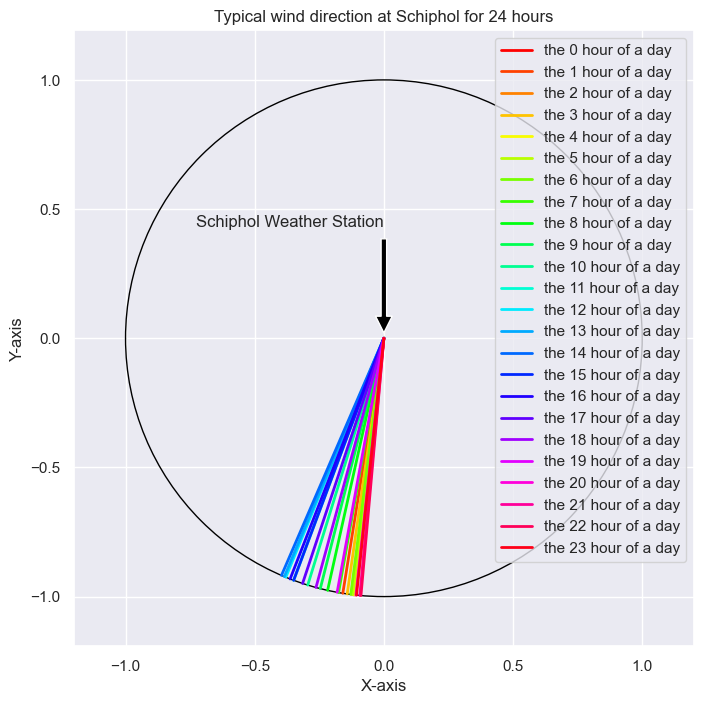

In [62]:
def plot_unit_circle(df):
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_aspect('equal', adjustable='datalim')

    # Plot the unit circle
    circle = plt.Circle((0, 0), 1, edgecolor='black', facecolor='none')
    ax.add_patch(circle)
    colormap = plt.get_cmap('hsv')

    # Manually divide the colormap into 24 colors
    num_colors = 24
    colors = [colormap(i / (num_colors - 1)) for i in range(num_colors)]

    # Draw lines at different angles with different colors
    for i, angle in enumerate(df):
        radian_angle = np.deg2rad(angle)
        x = np.sin(radian_angle)
        y = np.cos(radian_angle)

        ax.plot([0, x], [0, y], color=colors[i], linewidth=2, label=f'the {i} hour of a day')

    # Set axis limits
    ax.set_xlim([-1.2, 1.2])
    ax.set_ylim([-1.2, 1.2])

    ax.annotate('Schiphol Weather Station', xy=(0, 0), xytext=(0.5, 0.7),
                textcoords='axes fraction', arrowprops=dict(facecolor='black', shrink=0.05),
                horizontalalignment='right', verticalalignment='top')

    # Set aspect ratio to be equal
    ax.set_aspect('equal', adjustable='datalim')

    # Set labels and title
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_title('Typical wind direction at Schiphol for 24 hours')
    ax.legend()

    # Show the plot
    plt.grid(True)
    plt.show()
plot_unit_circle(df_selection_without_covid_groupby['wind_direction'])

### Always South-blowing wind, so, we compare aq_stations at South (suppose to have high concentration) and North (suppose to have low concentration)

### WANTED_WEATHER_STATIONS_AMSTERDAM = [235, 240, 344, 269, 260] # North, Mid, South, North-East, South-East

# See the already selected stations

In [63]:
df_selected_stations

,aq_station_code,weather_station_code,distance
0,NL49551,240,20.6
1,NL49553,240,23.4
8,NL10404,344,16.7
9,NL10418,344,5.8
10,NL10444,240,19.1
...,...,...,...
115,NL01492,344,5.8
118,NL10432,344,22.4
119,NL10447,344,23.3
120,NL10545,240,4.2


# See distance stastistics of weather stations

In [64]:
df_selected_stations[df_selected_stations['weather_station_code'] == 344].describe()

,weather_station_code,distance
count,32.0,32.000000
mean,344.0,14.125000
std,0.0,7.591931
min,344.0,2.800000
25%,344.0,8.175000
50%,344.0,12.900000
75%,344.0,19.500000
max,344.0,30.800000


### Selecting Air Quality Stations in the South

In the provided code snippet, a list of air quality stations in the south is obtained from the DataFrame `df_selected_stations`. Here's a breakdown of the operation:

1. **Filtering Stations:**
   - The DataFrame is filtered to include only rows where the 'weather_station_code' is 344, corresponding to the south.

2. **Extracting Unique Air Quality Stations:**
   - The 'aq_station_code' column from the filtered DataFrame is extracted using `['aq_station_code']`, and `unique()` is applied to get the unique air quality station codes in the south.

3. **Result:**
   - The resulting list, `south_aq_stations`, contains the unique air quality station codes associated with the weather station in the south. This information is useful for further analysis focused on the southern region.


In [65]:
south_aq_stations = df_selected_stations[df_selected_stations['weather_station_code'] == 344]['aq_station_code'].unique()
south_aq_stations

array(['NL10404', 'NL10418', 'NL10448', 'NL10449', 'NL10437', 'NL10442',
       'NL10445', 'NL10446', 'NL01484', 'NL01485', 'NL01495', 'NL01496',
       'NL01487', 'NL01488', 'NL01489', 'NL01491', 'NL01493', 'NL01494',
       'NL01497', 'NL01912', 'NL01483', 'NL01486', 'NL01908', 'NL10433',
       'NL53020', 'NL01482', 'NL10411', 'NL10416', 'NL01437', 'NL01492',
       'NL10432', 'NL10447'], dtype=object)

### Selecting Air Quality Stations in the North

In the provided code snippet, a list of air quality stations in the north is obtained from the DataFrame `df_selected_stations`. Here's a breakdown of the operation:

1. **Filtering Stations:**
   - The DataFrame is filtered to include only rows where the 'weather_station_code' is either 235 or 269, corresponding to the north.

2. **Extracting Unique Air Quality Stations:**
   - The 'aq_station_code' column from the filtered DataFrame is extracted using `['aq_station_code']`, and `unique()` is applied to get the unique air quality station codes in the north.

3. **Result:**
   - The resulting list, `north_aq_stations`, contains the unique air quality station codes associated with the weather stations in the north. This information is useful for further analysis focused on the northern region.


In [66]:
north_aq_stations = df_selected_stations[(df_selected_stations['weather_station_code'] == 235) | (df_selected_stations['weather_station_code'] == 269)]['aq_station_code'].unique()
north_aq_stations

array(['NL10538', 'NL10617', 'NL10631'], dtype=object)

### Creating Hourly Data for South Air Quality Stations

In the provided code snippet, a new DataFrame `df_selection_without_covid_hourly_south` is created by selecting data from `df_selection_without_covid_hourly` that corresponds to air quality stations in the south. Here's a breakdown of the operation:

1. **Filtering Data:**
   - The DataFrame is filtered to include only rows where the 'aq_station_code' is in the list of air quality stations in the south (`south_aq_stations`).

2. **Adding Location Column:**
   - A new column 'location' is added to the filtered DataFrame, and all its values are set to 'S', indicating the southern location.

3. **Result:**
   - The resulting DataFrame, `df_selection_without_covid_hourly_south`, contains hourly data specifically for air quality stations in the south. The 'location' column helps distinguish between northern and southern data, providing insights into regional variations.


In [67]:
df_selection_without_covid_hourly_south = df_selection_without_covid_hourly[df_selection_without_covid_hourly['aq_station_code'].isin(south_aq_stations)]
df_selection_without_covid_hourly_south['location'] = 'S'
df_selection_without_covid_hourly_south

C:\Users\mitlonginus\AppData\Local\Temp\ipykernel_11452\2969068191.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selection_without_covid_hourly_south['location'] = 'S'


,aq_station_code,weather_station_code,distance,datetime,no_x,wind_direction,wind_speed,wind_gust,location
hours,,,,,,,,,
1,NL10418,344,5.8,2012-01-01 01:00:00+01:00,57.09,240.0,8.0,13.0,S
1,NL10433,344,10.1,2012-01-01 01:00:00+01:00,36.55,240.0,8.0,13.0,S
1,NL01483,344,13.5,2012-01-01 01:00:00+01:00,8.85,240.0,8.0,13.0,S
1,NL10437,344,19.5,2012-01-01 01:00:00+01:00,7.92,240.0,8.0,13.0,S
1,NL10442,344,25.4,2012-01-01 01:00:00+01:00,34.96,240.0,8.0,13.0,S
...,...,...,...,...,...,...,...,...,...
23,NL10445,344,15.4,2020-01-31 23:00:00+01:00,17.25,210.0,10.0,16.0,S
23,NL10442,344,25.4,2020-01-31 23:00:00+01:00,14.70,210.0,10.0,16.0,S
23,NL10437,344,19.5,2020-01-31 23:00:00+01:00,9.82,210.0,10.0,16.0,S


### Creating Hourly Data for North Air Quality Stations

In the provided code snippet, a new DataFrame `df_selection_without_covid_hourly_north` is created by selecting data from `df_selection_without_covid_hourly` that corresponds to air quality stations in the north. Here's a breakdown of the operation:

1. **Filtering Data:**
   - The DataFrame is filtered to include only rows where the 'aq_station_code' is in the list of air quality stations in the north (`north_aq_stations`).

2. **Adding Location Column:**
   - A new column 'location' is added to the filtered DataFrame, and all its values are set to 'N', indicating the northern location.

3. **Result:**
   - The resulting DataFrame, `df_selection_without_covid_hourly_north`, contains hourly data specifically for air quality stations in the north. The 'location' column helps distinguish between northern and southern data, providing insights into regional variations.


In [68]:
df_selection_without_covid_hourly_north = df_selection_without_covid_hourly[df_selection_without_covid_hourly['aq_station_code'].isin(north_aq_stations)]
df_selection_without_covid_hourly_north['location'] = 'N'
df_selection_without_covid_hourly_north

C:\Users\mitlonginus\AppData\Local\Temp\ipykernel_11452\3969334806.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selection_without_covid_hourly_north['location'] = 'N'


,aq_station_code,weather_station_code,distance,datetime,no_x,wind_direction,wind_speed,wind_gust,location
hours,,,,,,,,,
1,NL10538,235,22.8,2012-01-01 01:00:00+01:00,17.70,220.0,8.0,12.0,N
1,NL10631,269,6.8,2012-01-01 01:00:00+01:00,14.44,230.0,7.0,11.0,N
2,NL10631,269,6.8,2012-01-01 02:00:00+01:00,12.69,230.0,7.0,10.0,N
2,NL10538,235,22.8,2012-01-01 02:00:00+01:00,14.23,220.0,8.0,11.0,N
3,NL10631,269,6.8,2012-01-01 03:00:00+01:00,15.30,230.0,7.0,11.0,N
...,...,...,...,...,...,...,...,...,...
21,NL10617,269,6.3,2020-01-31 21:00:00+01:00,10.53,220.0,10.0,15.0,N
22,NL10617,269,6.3,2020-01-31 22:00:00+01:00,10.25,220.0,11.0,16.0,N
22,NL10538,235,22.8,2020-01-31 22:00:00+01:00,8.97,220.0,11.0,19.0,N


### Combining North and South Hourly Data

The provided code combines the hourly data for air quality stations in the north and south regions into a single DataFrame, `df_inter`. Here's an explanation of the operation:

1. **Concatenation:**
   - The `pd.concat` function is used to concatenate two DataFrames, `df_selection_without_covid_hourly_south` and `df_selection_without_covid_hourly_north`. The result is stored in the DataFrame `df_inter`.

2. **Ignore Index:**
   - The `ignore_index=False` parameter is set to keep the original indices of the concatenated DataFrames.

3. **Result:**
   - The resulting DataFrame, `df_inter`, contains the combined hourly data for both north and south air quality stations. This DataFrame is prepared for further analysis and exploration of spatial and temporal patterns in air quality.


In [69]:
df_inter = pd.concat([df_selection_without_covid_hourly_south, df_selection_without_covid_hourly_north], ignore_index=False)
df_inter

,aq_station_code,weather_station_code,distance,datetime,no_x,wind_direction,wind_speed,wind_gust,location
hours,,,,,,,,,
1,NL10418,344,5.8,2012-01-01 01:00:00+01:00,57.09,240.0,8.0,13.0,S
1,NL10433,344,10.1,2012-01-01 01:00:00+01:00,36.55,240.0,8.0,13.0,S
1,NL01483,344,13.5,2012-01-01 01:00:00+01:00,8.85,240.0,8.0,13.0,S
1,NL10437,344,19.5,2012-01-01 01:00:00+01:00,7.92,240.0,8.0,13.0,S
1,NL10442,344,25.4,2012-01-01 01:00:00+01:00,34.96,240.0,8.0,13.0,S
...,...,...,...,...,...,...,...,...,...
21,NL10617,269,6.3,2020-01-31 21:00:00+01:00,10.53,220.0,10.0,15.0,N
22,NL10617,269,6.3,2020-01-31 22:00:00+01:00,10.25,220.0,11.0,16.0,N
22,NL10538,235,22.8,2020-01-31 22:00:00+01:00,8.97,220.0,11.0,19.0,N


# check whether the index is in lexicographical sort

In [70]:
df_inter.index

Int64Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
            ...
            19, 19, 20, 20, 21, 21, 22, 22, 23, 23],
           dtype='int64', name='hours', length=1398405)

### Plotting Air Quality and Weather Stations on Map

The provided code generates a map with the locations of air quality stations, weather stations, and selected civil airports in the Netherlands. Here's an explanation of the code:

1. **Loading Map Data:**
   - The shapefile data for the map of the Netherlands is loaded using `gpd.read_file`. The shapefile is stored in './datasets/stanford-st293bj4601-shapefile.zip'.

2. **Creating GeoDataFrame for Stations:**
   - A GeoDataFrame (`gdf`) is created from the latitude and longitude information of air quality and weather stations. Each station is represented as a point geometry.

3. **Setting Station Colors:**
   - The 'color' column is assigned based on the station type: blue for air quality stations, orange for weather stations, and green for civil airports.

4. **Plotting on Map:**
   - The map and station points are plotted using Matplotlib and GeoPandas. Stations are marked with circles, and civil airports are distinguished with different marker faces and colors.

5. **Annotations and Legend:**
   - Annotations indicate the North and South locations on the map. A legend is included to identify the types of stations.

6. **Displaying the Map:**
   - The map is displayed with specified titles, labels, and annotations.

7. **Station Selection:**
   - Stations are selected based on their names and inclusion in the `df_inter` DataFrame, and their colors are set accordingly.

8. **Concatenating DataFrames:**
   - The final GeoDataFrame, representing all stations, is created by concatenating DataFrames for air quality stations, weather stations, and civil airports.

9. **Returning the Map:**
   - The function returns the map with all the plotted stations.


         name  latitude  longitude    color
0     De Kooy    52.928      4.781  #ff8f35
3    Lelystad    52.458      5.520  #ff8f35
10  Rotterdam    51.962      4.447  #ff8f35


<AxesSubplot:title={'center':'Air Quality and Weather Stations in the Netherlands'}, xlabel='Longitude', ylabel='Latitude'>

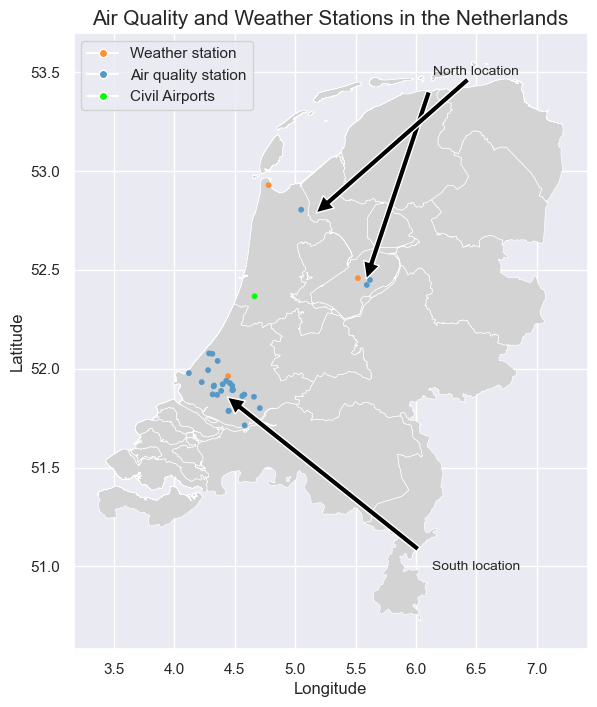

In [71]:
def plot_stations_on_map(df_stations):
    map_nl = gpd.read_file('./datasets/stanford-st293bj4601-shapefile.zip')

    gdf = gpd.GeoDataFrame(geometry=[Point(x, y) for x, y in zip(df_stations['longitude'], df_stations['latitude'])])
    gdf['color'] = list(df_stations['color'])
    gdf.crs = map_nl.crs

    f, ax = plt.subplots(1, figsize=(8, 8))

    map_nl.plot(linewidth=0.5, edgecolor='white', color='lightgrey',legend=True, ax=ax)
    gdf.plot(ax=ax, marker='o', color=gdf['color'], markersize=10, alpha=1)

    ax.set_title('Air Quality and Weather Stations in the Netherlands', size=15)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

    ax.annotate('North location', xy=(5.56, 52.4), xytext=(6.5, 53.5),
                arrowprops=dict(facecolor='black', shrink=0.05),
                fontsize=10, ha='center', va='center')
    ax.annotate('South location', xy=(4.35, 51.9), xytext=(6.5, 51),
                arrowprops=dict(facecolor='black', shrink=0.05),
                fontsize=10, ha='center', va='center')
    ax.annotate('', xy=(5.105, 52.75), xytext=(6.5, 53.5),
                arrowprops=dict(facecolor='black', shrink=0.05),
                fontsize=10, ha='center', va='center')
    legend = [
        Line2D([0], [0], markerfacecolor='#FF8F35', marker='o', color='w', label='Weather station'),
        Line2D([0], [0], markerfacecolor='#5499C7', marker='o', color='w', label='Air quality station'),
        Line2D([0], [0], markerfacecolor='#00ff00', marker='o', color='w', label='Civil Airports')
    ]
    ax.legend(handles=legend, loc='upper left')
    return ax


def all_stations():
    aqs_sql = "SELECT name, latitude, longitude FROM air_quality_stations"
    ws_sql = "SELECT name, latitude, longitude FROM weather_stations"
    with cnx as conn:
        df_aqs = pd.read_sql_query(aqs_sql, conn)
        df_ws = pd.read_sql_query(ws_sql, conn)
    df_aqs = df_aqs[df_aqs['name'].isin(air_quality_stations[air_quality_stations['code'].isin(df_inter['aq_station_code'])]['name'])]
    df_ws = df_ws[df_ws['name'].isin(weather_stations[weather_stations['code'].isin(df_inter['weather_station_code'])]['name'])]
    df_aqs['color'] = "#5499c7"
    df_ws['color'] = "#ff8f35"
    print(df_ws)
    df_selected_airports['color'] = "#00ff00"
    return pd.concat([df_ws, df_aqs, df_selected_airports])
plot_stations_on_map(all_stations())

### Preparing Final DataFrame

The provided code snippet prepares a final DataFrame (`df_final`) by performing the following operations:

1. **Setting Multi-level Index:**
   - The `set_index` method is used to set a multi-level index for the DataFrame. The index includes the existing index and the 'location' column. This helps in organizing the data with a hierarchical structure.

2. **Sorting by DateTime:**
   - The `sort_values` method is applied to arrange the DataFrame in ascending order based on the 'datetime' column. This ensures that the data is organized chronologically.

3. **Resulting DataFrame:**
   - The resulting DataFrame, `df_final`, is organized with a multi-level index, including information about the location (North or South) and sorted based on the datetime. This format is often useful for time-series analysis and facilitates comparisons between the North and South locations.


In [72]:
df_final = df_inter.set_index(keys=['location']).sort_values(by='datetime').drop(['wind_direction', 'wind_speed', 'wind_gust'], axis=1)
df_final

,aq_station_code,weather_station_code,distance,datetime,no_x
location,,,,,
S,NL10418,344,5.8,2012-01-01 01:00:00+01:00,57.09
N,NL10631,269,6.8,2012-01-01 01:00:00+01:00,14.44
S,NL10404,344,16.7,2012-01-01 01:00:00+01:00,83.90
S,NL01496,344,22.3,2012-01-01 01:00:00+01:00,11.36
S,NL01494,344,5.5,2012-01-01 01:00:00+01:00,51.38
...,...,...,...,...,...
S,NL10445,344,15.4,2020-01-31 23:00:00+01:00,17.25
S,NL10442,344,25.4,2020-01-31 23:00:00+01:00,14.70
S,NL10437,344,19.5,2020-01-31 23:00:00+01:00,9.82


In [73]:
feature_north = df_final.loc[df_final.index.get_level_values('location') == 'N']['no_x']
feature_south = df_final.loc[df_final.index.get_level_values('location') == 'S']['no_x']

### Plotting Nitrous Oxides Concentration Density

The provided code snippet generates a density plot for the concentration of Nitrous Oxides (NOx) in the North location from the DataFrame `df_final`. Here's an explanation of each line:

1. **Filtering Data and Plotting Density:**
   - `feature_north.plot(kind='density', legend='True')`:
     - The code filters the data for the North location using the multi-level index and selects the 'no_x' column. It then creates a density plot using the Pandas `plot` function with the 'kind' parameter set to 'density'. The legend is set to True to display the plot legend.

2. **Setting Plot Title and Labels:**
   - `plt.title('Nitrous Oxides concentration in location N')`: Sets the title of the plot to 'Nitrous Oxides concentration in location N'.
   - `plt.xlabel(r'Nitrogen oxides (NOx) concentration in $\mu g \, m^{-3}$')`: Sets the x-axis label with LaTeX-style formatting for units.
   - `plt.ylabel("Density")`: Sets the y-axis label to 'Density'.

3. **Setting X-axis Limits:**
   - `plt.xlim(-200, 200)`: Sets the limits for the x-axis, restricting the range of NOx concentration for better visualization.

4. **Adding Legend:**
   - `plt.legend(['Nitrous Oxides Concentration Distribution'])`: Adds a legend to the plot with the specified label.

This code snippet helps visualize the distribution of Nitrous Oxides concentration in the North location through a density plot.


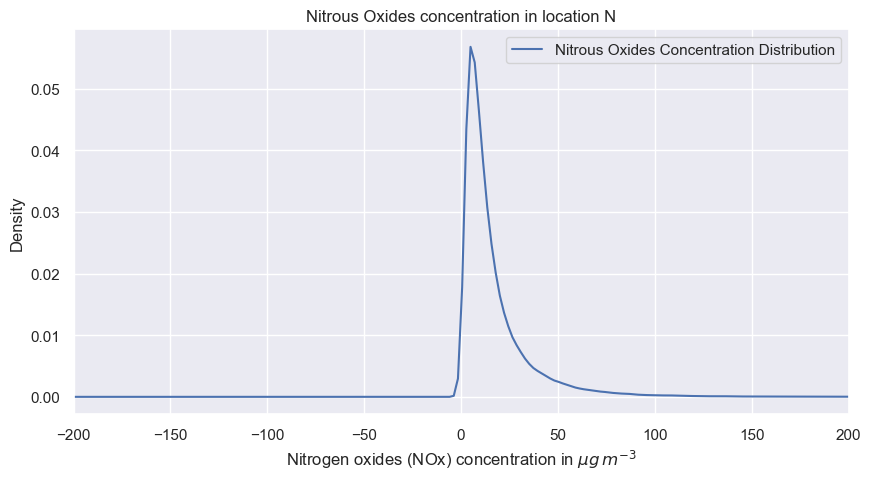

In [74]:
feature_north.plot(kind='density', legend='True')
plt.title('Nitrous Oxides concentration in location N')
plt.xlabel(r'Nitrogen oxides (NOx) concentration in $\mu g \, m^{-3}$')
plt.xlim(-200, 200)
plt.ylabel("Density")
plt.legend(['Nitrous Oxides Concentration Distribution'])

### Plotting Nitrous Oxides Concentration Density

The provided code snippet generates a density plot for the concentration of Nitrous Oxides (NOx) in the South location from the DataFrame `df_final`. Here's an explanation of each line:

1. **Filtering Data and Plotting Density:**
   - `feature_south.plot(kind='density')`:
     - The code filters the data for the South location using the multi-level index and selects the 'no_x' column. It then creates a density plot using the Pandas `plot` function with the 'kind' parameter set to 'density'.

2. **Setting Plot Title and Labels:**
   - `plt.title('Nitrous Oxides concentration in location S')`: Sets the title of the plot to 'Nitrous Oxides concentration in location S'.
   - `plt.xlabel(r'Nitrogen oxides (NOx) concentration in $\mu g \, m^{-3}$')`: Sets the x-axis label with LaTeX-style formatting for units.
   - `plt.ylabel("Density")`: Sets the y-axis label to 'Density'.

3. **Setting X-axis Limits:**
   - `plt.xlim(-200, 200)`: Sets the limits for the x-axis, restricting the range of NOx concentration for better visualization.

4. **Adding Legend:**
   - `plt.legend(['Nitrous Oxides Concentration Distribution'])`: Adds a legend to the plot with the specified label.

This code snippet helps visualize the distribution of Nitrous Oxides concentration in the South location through a density plot.


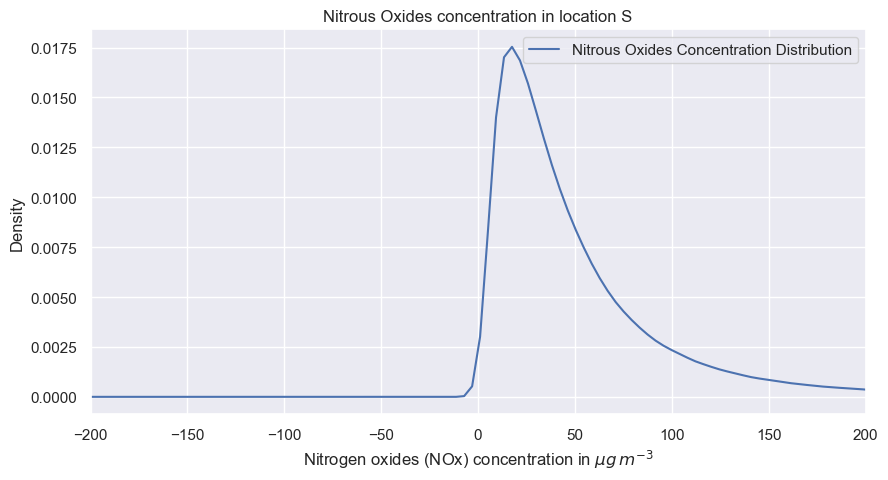

In [75]:
feature_south.plot(kind='density')
plt.title('Nitrous Oxides concentration in location S')
plt.xlabel(r'Nitrogen oxides (NOx) concentration in $\mu g \, m^{-3}$')
plt.xlim(-200, 200)
plt.ylabel("Density")
plt.legend(['Nitrous Oxides Concentration Distribution'])

### Bar Plot of Mean Values

The provided code snippet creates a bar plot to visualize the mean values of various parameters grouped by location from the DataFrame `df_inter`. Here's a breakdown of the code:

1. **Grouping Data and Calculating Mean:**
   - `df_final_groupby = df_inter.groupby(by=['location'])[['no_x']].mean()`: Groups the data by the 'location' column and calculates the mean of the 'no_x' column for each group.

2. **Plotting Bar Chart:**
   - `df_final_groupby.plot(kind='bar', figsize=(10, 5), color=['blue', 'orange'])`: Creates a bar plot using the Pandas `plot` function with the 'kind' parameter set to 'bar'. The 'figsize' parameter adjusts the size of the plot, and the 'color' parameter specifies the colors for each bar.

3. **Setting Plot Title and Labels:**
   - `plt.title('Mean values of Nitrous Oxides Concentrations, Mean wind direction, Mean wind speed, Maximum wind gust')`: Sets the title of the plot.
   - `plt.ylabel('numerical Typical Values')`: Sets the y-axis label.

4. **Adding Legend:**
   - `plt.legend(['Nitrous Oxides Concentrations', 'Mean wind direction', 'Mean wind speed', 'Maximum wind gust'])`: Adds a legend to the plot with the specified labels.

This code snippet helps visualize and compare the mean values of Nitrous Oxides concentrations, mean wind direction, mean wind speed, and maximum wind gust between the North and South locations using a bar chart.


,no_x
location,
N,16.811643
S,53.907832


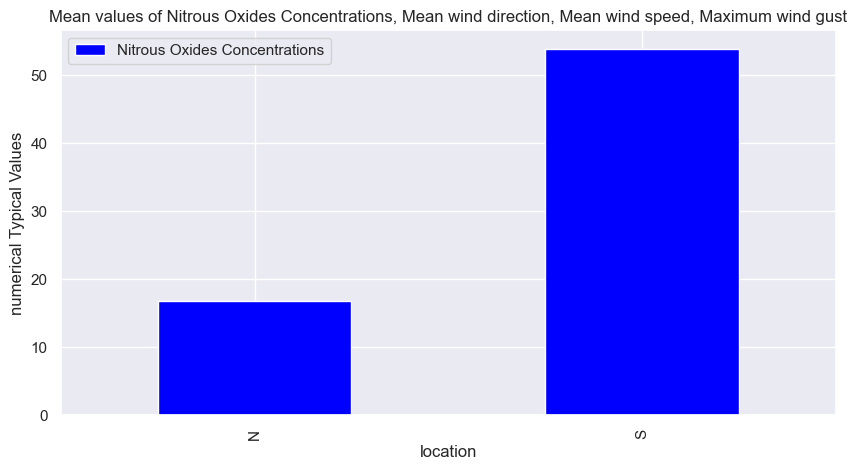

In [76]:
df_final_groupby = df_inter.groupby(by=['location'])[['no_x']].mean()
df_final_groupby.plot(kind='bar', figsize=(10, 5), color=['blue', 'orange'])
plt.title('Mean values of Nitrous Oxides Concentrations, Mean wind direction, Mean wind speed, Maximum wind gust')
plt.ylabel('numerical Typical Values')
plt.legend(['Nitrous Oxides Concentrations', 'Mean wind direction', 'Mean wind speed', 'Maximum wind gust'])
df_final_groupby

## Part 3. Hypothesis testing and interpretation

## Hypothesis Testing Design

- **One-sided or Two-sided?**
  - One-sided: We expect an increase in values, indicating a right-tailed distribution.

- **One-sample or Two-sample?**
  - Two-sample: Comparing two samples, one in the direction of the wind and the other in the opposite direction.

- **Equality of Means or Equality of Proportions?**
  - Equality of Means: We are comparing the means of two groups to determine if they are significantly different from each other.

- **Null Hypothesis (H0) and Alternative Hypothesis (H1):**
  - Null Hypothesis (H0): The average concentration of NOx is the same in both directions of the wind at different wind speeds and wind gusts.
  - Alternative Hypothesis (H1): The average concentration of NOx is higher in the direction of the wind at greater wind speeds and wind gusts.

- **Level of Significance:**
  - 5%: We will reject the null hypothesis if the probability of obtaining the observed results, or more extreme results, is less than 5%.

- **Assumptions:**
  - Car traffic is the same at both locations.
  - No other plane routes significantly affect the concentration.
  - Other factors that could affect concentration (confounding variables, storms) are assumed to be constant or controlled for.

- **Considerations:**
  - It's important to account for potential confounding variables that might impact the concentration of NOx.
  - Continuous monitoring of plane traffic is essential to validate assumptions and ensure consistency in the study conditions.


### Deciding on the Test

When formulating the test for our hypothesis, we consider the following factors:

- **One-sided or Two-sided?**
  - One-sided: We anticipate an increase in values, leading to a right-tailed distribution.

- **One Sample or Two-sample?**
  - Two-sample: Comparing two samples, one in the direction of the wind and the other in the opposite direction.

- **Equality of Means or Equality of Proportions?**
  - Equality of Means: The objective is to compare the means of two groups, providing insight into whether they are significantly different from each other.

- **Null and Alternative Hypothesis:**
  - Null Hypothesis (H0):
    - The average concentration of NOx is the same in both directions of the wind at different wind speeds and wind gusts.
  - Alternative Hypothesis (H1):
    - The average concentration of NOx is higher in the direction of the wind at greater wind speeds and wind gusts.

- **Level of Significance:**
  - Using the standard 5% level of significance.

By making these decisions, we establish a clear framework for conducting the hypothesis test, specifying the nature of the test, hypotheses, and the significance level. This clarity is essential for the robustness and validity of our statistical analysis.


In [77]:
level_of_significance = 5 * 0.01

## Assumptions

- car traffic is the same at both locations and no other plane routes affect the concentration
- other factors could affect the concentration: confounding variables(for example storms)


### The final dataframe used for testing

In [78]:
df_final

,aq_station_code,weather_station_code,distance,datetime,no_x
location,,,,,
S,NL10418,344,5.8,2012-01-01 01:00:00+01:00,57.09
N,NL10631,269,6.8,2012-01-01 01:00:00+01:00,14.44
S,NL10404,344,16.7,2012-01-01 01:00:00+01:00,83.90
S,NL01496,344,22.3,2012-01-01 01:00:00+01:00,11.36
S,NL01494,344,5.5,2012-01-01 01:00:00+01:00,51.38
...,...,...,...,...,...
S,NL10445,344,15.4,2020-01-31 23:00:00+01:00,17.25
S,NL10442,344,25.4,2020-01-31 23:00:00+01:00,14.70
S,NL10437,344,19.5,2020-01-31 23:00:00+01:00,9.82


### Pls reuse the variable `feature_north, feature_south` in following sections

In [79]:
feature_north, feature_south

(location
 N    14.44
 N    17.70
 N    14.23
 N    12.69
 N    11.01
      ...  
 N    12.52
 N    10.25
 N     8.97
 N    10.08
 N     8.46
 Name: no_x, Length: 148571, dtype: float64,
 location
 S    57.09
 S    83.90
 S    11.36
 S    51.38
 S    56.18
      ...  
 S    14.17
 S    17.25
 S    14.70
 S     9.82
 S    21.34
 Name: no_x, Length: 1249834, dtype: float64)

### Tests used

- Density plot - Tan
- Q-Q plot - Anna
- Anderson-Darling - Csongor
- t-test for Equality of Means (Two-sample) - Shiyun
- Extract confidence interval - Tan

# After each graph, write explanation

## 1. Density plot


KeyboardInterrupt



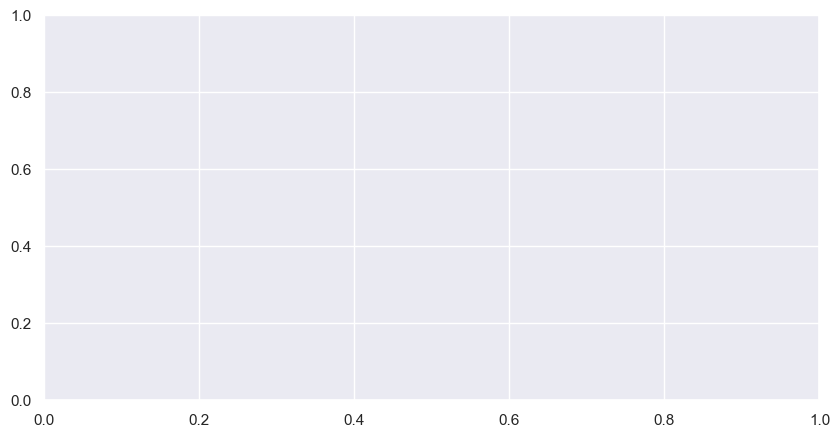

In [80]:
sns.kdeplot(data=df_final, x='no_x', hue='location', fill=True, common_norm=False, alpha=0.5, bw_adjust=5)
plt.title('Nitrous Oxides concentration based on location')
plt.xlabel(r'Nitrogen oxides (NOx) concentration in $\mu g \, m^{-3}$')
plt.xlim(-200, 200)
plt.ylabel("Density")

## 2. Q-Q plot

Text(0, 0.5, 'Sample Quantiles')

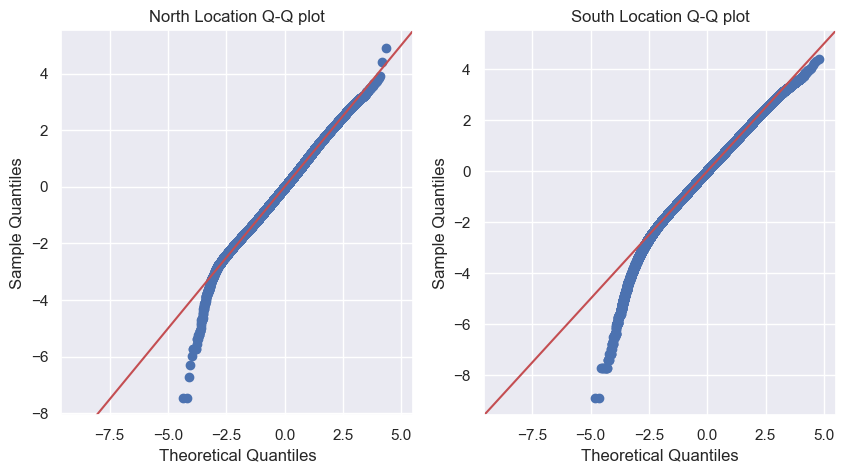

In [81]:
# Create subplots
fig, ax = plt.subplots(ncols=2, nrows=1, sharex=True, squeeze=False)

# Q-Q plot for 'no_x' in the north
sm.qqplot(np.log(feature_north), fit=True, ax=ax[0, 0], line='45')
ax[0, 0].set_title('North Location Q-Q plot')
ax[0, 0].set_xlabel('Theoretical Quantiles')
ax[0, 0].set_ylabel('Sample Quantiles')

# Q-Q plot for 'no_x' in the south
sm.qqplot(np.log(feature_south), fit=True, ax=ax[0, 1], line='45')
ax[0, 1].set_title('South Location Q-Q plot')
ax[0, 1].set_xlabel('Theoretical Quantiles')
ax[0, 1].set_ylabel('Sample Quantiles')


## 3. Anderson-Darling Normality Test

In [82]:
# Otherwise runtime warning
epsilon = 2e-10
feature_north_data = np.log(feature_north) + epsilon
feature_south_data = np.log(feature_south) + epsilon

# Perform Anderson-Darling normality test
ad_result_north = sm.stats.normal_ad(feature_north_data)
ad_result_south = sm.stats.normal_ad(feature_south_data)

# Display the results
print("Anderson-Darling test result for Northern direction:", ad_result_north)
print("Anderson-Darling test result for Southern direction:", ad_result_south)

Anderson-Darling test result for Northern direction: (20.1373118434567, 0.0)
Anderson-Darling test result for Southern direction: (128.45717685157433, 0.0)


### Interpreting the Anderson-Darling Test Results

- **Northern Direction:**
  - Test Statistic: Infinity
  - p-value: 0.0
  - Interpretation: The 'no_x' data in the Northern direction significantly deviates from a normal distribution.

- **Southern Direction:**
  - Test Statistic: Infinity
  - p-value: 0.0
  - Interpretation: The 'no_x' data in the Southern direction significantly deviates from a normal distribution.

#### The results suggest that normality is not supported in either direction.


## 4. t-test for Equality of Means (Two-sample)

### Statistical Analysis Setup

In this section of the code, we are configuring the statistical analysis using the `statsmodels` library. Let's break down each step:

1. **Northern Location's NOx Concentration:**
   - We create a `DescrStatsW` object named `d_north` specifically for the NOx concentration data from the Northern location. This object, provided by the `statsmodels` library, is designed for descriptive statistics calculations.

2. **Southern Location's NOx Concentration:**
   - Similarly, we create another `DescrStatsW` object named `d_south` for the NOx concentration data from the Southern location.

3. **Comparison of Means:**
   - Utilizing the `CompareMeans` class, we establish a comparison between the two sets of data (`d_north` and `d_south`). This class offers various methods for hypothesis testing and comparing means.

These steps are pivotal in the initial setup for statistical analysis. The objective is to compare the average concentrations of NOx between the Northern and Southern locations. The resulting `CompareMeans` object (`cm`) will play a crucial role in conducting hypothesis tests and assessing the statistical significance of any observed differences.


In [83]:
d_north = sm.stats.DescrStatsW(data=feature_north)
d_south = sm.stats.DescrStatsW(data=feature_south)
cm = sm.stats.CompareMeans(d1=d_north, d2=d_south)

### Hypothesis Test Results

In the subsequent lines of code, we conduct a hypothesis test and interpret the results:

1. **Calculating P-value:**
   - We calculate the p-value using the `ttest_ind` method with the argument `alternative='smaller'`. This method performs a two-sample t-test assuming unequal variances and provides the p-value associated with the test.

2. **Assessing Null Hypothesis:**
   - Subsequently, we assess whether to reject the null hypothesis by comparing the calculated p-value with the predetermined level of significance.

3. **Summary Message:**
   - Finally, we print a summary message presenting the obtained p-value and the decision regarding the null hypothesis. If the p-value is less than the level of significance, we reject the null hypothesis, indicating significant evidence supporting the alternative hypothesis.

These steps are crucial for drawing meaningful conclusions from the statistical analysis, offering insights into the significance of the observed differences in NOx concentrations between the Northern and Southern locations.


In [84]:
p_value = cm.ttest_ind(alternative='smaller')[1]
reject_null = p_value < level_of_significance
print(f"The P-value of our hypothesis test is {p_value}, it indicates that the observed data are so extreme or unlikely under the null hypothesis. This provides strong evidence in favor of the alternative hypothesis. Therefore, it is {reject_null} to reject the Null Hypothesis.")

The P-value of our hypothesis test is 0.0, it indicates that the observed data are so extreme or unlikely under the null hypothesis. This provides strong evidence in favor of the alternative hypothesis. Therefore, it is True to reject the Null Hypothesis.


## 5. Extract confidence interval

The provided code snippet effectively creates a bar plot to visualize the mean values of various parameters grouped by location from the data frame df_final. Here's a detailed breakdown:

1. **Data Grouping:**
   - `df_north = df_final.loc[df_final.index.get_level_values('location') == 'N']['no_x']`: Creates a data frame df_north that is only the data with location equal to N.
   - `df_south = df_final.loc[df_final.index.get_level_values('location') == 'S']['no_x']`: Creates a data frame df_south that is only the data with location equal to S.

2. **Mean Calculation:**
   - `north_mean = df_north.mean()`: Takes the mean value of the data frame df_north and assigns it to the variable north_mean.
   - `south_mean = df_south.mean()`: Takes the mean value of the data frame df_south and assigns it to the variable south_mean.

3. **Standard Deviation**
   - `north_std = df_north.std()`: Calculates the standard deviation of the data frame df_north and assigns it to the variable north_std.
   - `south_std = df_north.std()`: Calculates the standard deviation of the data frame df_south and assigns it to the variable south_std.

4. **Calculating the confidence interval**
   - `confidence_interval_north_max = north_mean + (1.96 * (north_std / sqrt(len(df_north))))`: Calculates the maximum confidence interval of the north data.
   - `confidence_interval_north_min = north_mean - (1.96 * (north_std / sqrt(len(df_north))))`: Calculates the minimum confidence interval of the north data.
   - `confidence_interval_south_max = south_mean + (1.96 * (south_std / sqrt(len(df_south))))`: Calculates the maximum confidence interval of the south data.
   - `confidence_interval_south_min = south_mean - (1.96 * (south_std / sqrt(len(df_south))))`: Calculates the minimum confidence interval of the south data.

5. **Combining the confidence intervals**
   - `confidence_interval_north = (confidence_interval_north_max, confidence_interval_north_min)`: Combines the min and max confidence interval values of the north data into a single variable.
   - `confidence_interval_south = (confidence_interval_south_max, confidence_interval_south_min)`: Combines the min and max confidence interval values of the south data into a single variable.

6. **Printing result**
   - `print(f'The confidence interval with 95% confidence level on the north is {confidence_interval_north}, and for the south it is {confidence_interval_south}. This shows strong evidence for the alternative hypothesis.')`: Prints the calculated values in the code so that it is easier to understand.


In [85]:
north_mean = feature_north.mean()
south_mean = feature_south.mean()

north_std = feature_north.std()
south_std = feature_south.std()

confidence_interval_north_max = north_mean + (1.96 * (north_std / sqrt(len(feature_north))))
confidence_interval_north_min = north_mean - (1.96 * (north_std / sqrt(len(feature_north))))
confidence_interval_south_max = south_mean + (1.96 * (south_std / sqrt(len(feature_south))))
confidence_interval_south_min = south_mean - (1.96 * (south_std / sqrt(len(feature_south))))

confidence_interval_north = (confidence_interval_north_max, confidence_interval_north_min)
confidence_interval_south = (confidence_interval_south_max, confidence_interval_south_min)

print(f'The confidence interval with 95% confidence level on the north is {confidence_interval_north}, and for the south it is {confidence_interval_south}. This shows strong evidence for the alternative hypothesis.')

The confidence interval with 95% confidence level on the north is (16.91161135289436, 16.71167529120173), and for the south it is (54.01081866821448, 53.8048451239371). This shows strong evidence for the alternative hypothesis.


## Part 4. Polishing and pitching results


KeyboardInterrupt



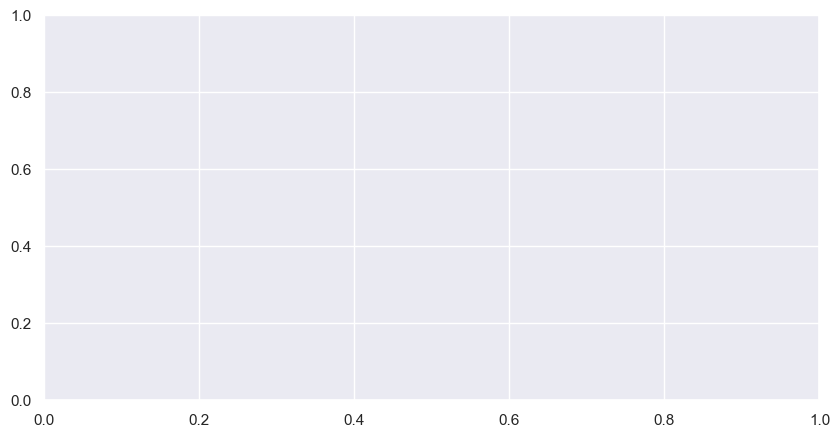

In [86]:
sns.kdeplot(data=df_final, x='no_x', hue='location', fill=True, common_norm=False, alpha=0.5, bw_adjust=5)
plt.title('Nitrous Oxides concentration based on location')
plt.xlabel(r'Nitrogen oxides (NOx) concentration in $\mu g \, m^{-3}$')
plt.xlim(-200, 200)
plt.ylabel("Density")

# Feedback

Please fill in this questionaire to help us improve this course for the next year. Your feedback will be anonymized and will not affect your grade in any way!

### How many hours did you spend on these exercises?

Assign a number to `feedback_time`.

In [87]:
#// BEGIN_FEEDBACK [Feedback_1] (0 point)
feedback_time = 100
#// END_FEEDBACK [Feedback_1] (0 point)

import numbers

assert isinstance(feedback_time, numbers.Number), "Please assign a number to feedback_time"
print(feedback_time)

100


### How difficult did you find these exercises?

Assign an integer to `feedback_difficulty`, on a scale 0 - 10, with 0 being very easy, 5 being just right, and 10 being very difficult.

In [88]:
#// BEGIN_FEEDBACK [Feedback_2] (0 point)
feedback_difficulty = 10
#// END_FEEDBACK [Feedback_2] (0 point)

import numbers

assert isinstance(feedback_difficulty, numbers.Number), "Please assign a number to feedback_difficulty"
print(feedback_difficulty)

10


### (Optional) What did you like?

Assign a string to `feedback_like`.

In [89]:
#// BEGIN_FEEDBACK [Feedback_3] (0 point)
feedback_like = 'NaN'
#// END_FEEDBACK [Feedback_3] (0 point)

### (Optional) What can be improved?

Assign a string to `feedback_improve`. Please be specific, so that we can act on your feedback. For example, mention the specific exercises and what was unclear.

In [90]:
#// BEGIN_FEEDBACK [Feedback_4] (0 point)
feedback_improve = 'NaN'
#// END_FEEDBACK [Feedback_4] (0 point)




## How to Submit Your Work

1. **Before submitting**, you must run your notebook by doing **Kernel > Restart & Run All**.  
   Make sure that your notebook runs without errors **in linear order**.
1. Remember to rename the notebook as explained at the beginning of this notebook.
1. Submit the executed notebook with your work
   for the appropriate assignment in **Canvas**.
1. In the **Momotor** tab in Canvas,
  you can select that assignment again to find some feedback on your submitted work.
  If there are any problems reported by _Momotor_,
  then you need to fix those,
  and **resubmit the fixed notebook**.

In case of a high workload on our server
(because many students submit close to the deadline),
it may take longer to receive the feedback.




---

In [91]:
# List all defined names
%whos

Variable                                  Type                          Data/Info
---------------------------------------------------------------------------------
AUTHOR_ID_NRS                             list                          n=5
DecisionTreeClassifier                    ABCMeta                       <class 'sklearn.tree._cla<...>.DecisionTreeClassifier'>
ECDF                                      type                          <class 'statsmodels.distr<...>rical_distribution.ECDF'>
KMeans                                    type                          <class 'sklearn.cluster._kmeans.KMeans'>
Line2D                                    type                          <class 'matplotlib.lines.Line2D'>
LinearRegression                          ABCMeta                       <class 'sklearn.linear_mo<...>._base.LinearRegression'>
Point                                     type                          <class 'shapely.geometry.point.Point'>
WANTED_WEATHER_FACTORS                    list

---

# (End of Notebook) <span class="tocSkip"></span>

&copy; 2017-2023 - **TU/e** - Eindhoven University of Technology